In [2]:
import fitz  # PyMuPDF
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and model for text summarization (This should only happen once)
tokenizer = AutoTokenizer.from_pretrained("Falconsai/text_summarization")
model = AutoModelForSeq2SeqLM.from_pretrained("Falconsai/text_summarization")

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)  # Open the PDF
    text = ""
    for page in doc:
        text += page.get_text("text")  # Extract text from each page
    return text

# Pre-process text by removing unnecessary metadata and section headers
def preprocess_text(text):
    # Remove section headers like "Abstract", "Introduction", etc.
    # You can further customize these patterns based on the content of your PDF.
    unwanted_headers = ["Abstract", "Introduction", "Objective", "Conclusion", "References"]
    lines = text.splitlines()

    # Remove unwanted sections (adjust to the specific structure of your document)
    filtered_lines = []
    for line in lines:
        if not any(header in line for header in unwanted_headers):
            filtered_lines.append(line)

    # Join the cleaned lines back into a single text block
    return " ".join(filtered_lines)

# Path to your PDF file (Replace with the correct path)
pdf_file_path = "/Users/harshkumar/mac/Final Year project/research paper/Automatic_Attendance_Marker_Using_Beacon_technology.pdf"

# Extract text from the provided PDF
pdf_text = extract_text_from_pdf(pdf_file_path)

# Preprocess the extracted text to remove unnecessary metadata and headers
processed_text = preprocess_text(pdf_text)

# Tokenize the processed text (if it's too long, truncate to the max length)
inputs = tokenizer(processed_text, return_tensors="pt", max_length=1024, truncation=True)

# Generate summary using the model (adjusted max_length and num_beams for better quality)
summary_ids = model.generate(inputs['input_ids'], max_length=400, min_length=100, num_beams=4, early_stopping=True)

# Decode the generated summary
decoded_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Print the generated summary in point-wise format
print("\nSummary:")
# Improved handling for sentence splitting
summary_points = decoded_summary.split('. ')
for i, point in enumerate(summary_points, start=1):
    print(f"{i}. {point.strip()}")



Summary:
1. Using Beacon technology Akash Hake Department of Electronics Engineering Sardar Patel Institute of Technology Mumbai, India rajendra sutar@spit.ac.in Amolina Samanta Department of Electronics Engineering Sardar Patel Institute of Technology Mumbai, India prashant Kasambe Department of Electronics Engineering Sardar Patel Institute of Technology Mumbai, India rajendra sutar@spit.ac.in A vast database would be generated that would include user information pertaining to the attendance.


In [3]:
# example 2

In [12]:
import fitz  # PyMuPDF
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and model for text summarization (This should only happen once)
tokenizer = AutoTokenizer.from_pretrained("Falconsai/text_summarization")
model = AutoModelForSeq2SeqLM.from_pretrained("Falconsai/text_summarization")

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)  # Open the PDF
    text = ""
    for page in doc:
        text += page.get_text("text")  # Extract text from each page
    return text

# Pre-process text by removing unnecessary metadata and section headers
def preprocess_text(text):
    # Remove section headers like "Abstract", "Introduction", etc.
    unwanted_headers = ["Abstract", "Introduction", "Objective", "Conclusion", "References", "Author"]
    lines = text.splitlines()

    # Remove unwanted sections (adjust to the specific structure of your document)
    filtered_lines = []
    for line in lines:
        # Skip lines containing unwanted headers or metadata like email addresses or names
        if not any(header in line for header in unwanted_headers):
            filtered_lines.append(line)
    
    # Join the cleaned lines back into a single text block
    return " ".join(filtered_lines)

# Path to your PDF file (Replace with the correct path)
pdf_file_path = "/Users/harshkumar/mac/Final Year project/research paper/Automatic_Attendance_Marker_Using_Beacon_technology.pdf"

# Extract text from the provided PDF
pdf_text = extract_text_from_pdf(pdf_file_path)

# Preprocess the extracted text to remove unnecessary metadata and headers
processed_text = preprocess_text(pdf_text)

# Tokenize the processed text (if it's too long, truncate to the max length)
inputs = tokenizer(processed_text, return_tensors="pt", max_length=1024, truncation=True)

# Generate summary using the model (adjusted max_length and num_beams for better quality)
summary_ids = model.generate(
    inputs['input_ids'], 
    max_length=600,     # Increase max_length for longer summary
    min_length=150,     # Ensure a minimum summary length
    num_beams=6,        # Higher num_beams for better quality
    early_stopping=True,
    temperature=0.7     # Control randomness in the output (lower temperature for more deterministic output)
)

# Decode the generated summary
decoded_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Print the generated summary as a continuous text block
print("\nSummary:")
print(decoded_summary)


FileNotFoundError: no such file: ''/Users/harshkumar/mac/Final Year project/research paper/Design_and_development_of_a_smart_attendance_management_system_with_Bluetooth_low_energy_beacons.pdf''

In [13]:
import fitz  # PyMuPDF
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and model for text summarization (This should only happen once)
tokenizer = AutoTokenizer.from_pretrained("Falconsai/text_summarization")
model = AutoModelForSeq2SeqLM.from_pretrained("Falconsai/text_summarization")

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)  # Open the PDF
    text = ""
    for page in doc:
        text += page.get_text("text")  # Extract text from each page
    return text

# Pre-process text by removing unnecessary metadata (like titles or references)
def preprocess_text(text):
    # You can remove certain known patterns, e.g., author names, header/footer text
    # Example: Remove metadata at the start (adjust based on your document's structure)
    lines = text.splitlines()
    
    # Assuming that metadata like author names or title are in the first few lines
    lines = lines[5:]  # Skip the first 5 lines (you can adjust this based on your PDF)
    
    return " ".join(lines)

# Path to your PDF file
pdf_file_path = "/Users/harshkumar/mac/Final Year project/research paper/Design_and_development_of_a_smart_attendance_management_system_with_Bluetooth_low_energy_beacons.pdf"

# Extract text from the provided PDF
pdf_text = extract_text_from_pdf(pdf_file_path)

# Preprocess the extracted text to remove unnecessary metadata
processed_text = preprocess_text(pdf_text)

# Tokenize the processed text (if it's too long, truncate to the max length)
inputs = tokenizer(processed_text, return_tensors="pt", max_length=1024, truncation=True)

# Generate summary using the model (adjusted max_length and num_beams for better quality)
summary_ids = model.generate(inputs['input_ids'], max_length=400, min_length=100, num_beams=4, early_stopping=True)

# Decode the generated summary
decoded_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Print the generated summary in point-wise format
print("\nSummary:")
# Improved handling for sentence splitting
summary_points = decoded_summary.split('. ')
for i, point in enumerate(summary_points, start=1):
    print(f"{i}. {point.strip()}")



Summary:
1. based on BLE beacons, a web service and a mobile application
2. This paper proposes the design of a smart attendance man- agement system based on BLE beacons
3. The design is based on three interacting components—BLE beacons, a web service and a mobile application
4. This paper proposes the design of an automatic attendance management system that addresses the problem of student attendance tracking
5. The design is based on three interacting components—BLE beacons, a web service


In [14]:
import fitz  # PyMuPDF
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and model for text summarization (This should only happen once)
tokenizer = AutoTokenizer.from_pretrained("Falconsai/text_summarization")
model = AutoModelForSeq2SeqLM.from_pretrained("Falconsai/text_summarization")

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)  # Open the PDF
    text = ""
    for page in doc:
        text += page.get_text("text")  # Extract text from each page
    return text

# Pre-process text by removing unnecessary metadata (like titles or references)
def preprocess_text(text):
    # You can remove certain known patterns, e.g., author names, header/footer text
    # Example: Remove metadata at the start (adjust based on your document's structure)
    unwanted_headers = ["Abstract", "Introduction", "Objective", "Conclusion", "References"]
    
    lines = text.splitlines()

    # Remove unwanted sections (adjust to the specific structure of your document)
    filtered_lines = []
    for line in lines:
        if not any(header in line for header in unwanted_headers):
            filtered_lines.append(line)

    # Join the cleaned lines back into a single text block
    return " ".join(filtered_lines)

# Path to your PDF file (Replace with the correct path)
pdf_file_path = "/Users/harshkumar/mac/Final Year project/research paper/Design_and_development_of_a_smart_attendance_management_system_with_Bluetooth_low_energy_beacons.pdf"

# Extract text from the provided PDF
pdf_text = extract_text_from_pdf(pdf_file_path)

# Preprocess the extracted text to remove unnecessary metadata and headers
processed_text = preprocess_text(pdf_text)

# Tokenize the processed text (if it's too long, truncate to the max length)
inputs = tokenizer(processed_text, return_tensors="pt", max_length=1024, truncation=True)

# Generate summary using the model (adjusted max_length and num_beams for better quality)
summary_ids = model.generate(
    inputs['input_ids'], 
    max_length=600,    # Increased max length for more detailed summaries
    min_length=150,    # Minimum length for the summary
    num_beams=6,       # Higher num_beams for better quality
    early_stopping=True,
    temperature=0.7    # Control randomness in the output (lower temperature for more deterministic output)
)

# Decode the generated summary
decoded_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Print the generated summary as a continuous text block
print("\nSummary:")
# Improved handling for sentence splitting
print(decoded_summary)



Summary:
. This paper proposes the design of a smart attendance management system with Bluetooth low energy beacons. The design incorporates three main components that interact to deliver a seamless user experience. The design is based on three interacting components—BLE beacons, a web service and a mobile application. The design is based on three interacting components—BLE beacons, a web service and a mobile application. This paper proposes the design of an automatic attendance management system that addresses the problem of student  e- posal of the design of a. The....... The. The. The. The.... The. The. The. The. The.. The. The. The.. The. The. The. The. The. The.. The. The. The. The.. The. The.. The. The.. The. The.. The. The.. The.. The.. The.. The.. The. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. The.. 

In [16]:
import fitz  # PyMuPDF
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and model for text summarization (BART model)
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)  # Open the PDF
    text = ""
    for page in doc:
        text += page.get_text("text")  # Extract text from each page
    return text

# Pre-process text by removing unnecessary metadata and section headers
def preprocess_text(text):
    # Remove section headers like "Abstract", "Introduction", etc.
    unwanted_headers = ["Abstract", "Introduction", "Objective", "Conclusion", "References"]
    lines = text.splitlines()

    # Remove unwanted sections
    filtered_lines = []
    for line in lines:
        if not any(header in line for header in unwanted_headers):
            filtered_lines.append(line)

    # Join the cleaned lines back into a single text block
    return " ".join(filtered_lines)

# Path to your PDF file
pdf_file_path = "/Users/harshkumar/mac/Final Year project/research paper/Design_and_development_of_a_smart_attendance_management_system_with_Bluetooth_low_energy_beacons.pdf"

# Extract text from the provided PDF
pdf_text = extract_text_from_pdf(pdf_file_path)

# Preprocess the extracted text to remove unnecessary metadata
processed_text = preprocess_text(pdf_text)

# Tokenize the processed text (if it's too long, truncate to the max length)
inputs = tokenizer(processed_text, return_tensors="pt", max_length=1024, truncation=True)

# Generate summary using the model (adjusted max_length and num_beams for better quality)
summary_ids = model.generate(
    inputs['input_ids'], 
    max_length=600,    # Increased max length for more detailed summaries
    min_length=150,    # Minimum length for the summary
    num_beams=6,       # Higher num_beams for better quality
    early_stopping=True,
    temperature=0.7    # Control randomness in the output (lower temperature for more deterministic output)
)

# Decode the generated summary
decoded_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Print the generated summary as a continuous text block
print("\nSummary:")
print(decoded_summary)


model.safetensors:   3%|3         | 52.4M/1.63G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.hf.co/facebook/bart-large-cnn/40041830399afb5348525ef8354b007ecec4286fdf3524f7e6b54377e17096cb?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1737570030&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczNzU3MDAzMH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9mYWNlYm9vay9iYXJ0LWxhcmdlLWNubi80MDA0MTgzMDM5OWFmYjUzNDg1MjVlZjgzNTRiMDA3ZWNlYzQyODZmZGYzNTI0ZjdlNmI1NDM3N2UxNzA5NmNiP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiJ9XX0_&Signature=aQYj33sMetKTfP%7E5Jfz6BBXwlQAEiVpIxmyTvgqi1vN%7E1xOkaQWoT2YJe0Miw2bcx-uTT2-AuDx%7ETJuHfNxwluq2vl-NF-t-zPmamAK8OksYWOUhqjL5ya%7ETwO8XLnWhUCOrRLYfwD1cuW-YUUX-UpjS3jcZrlibJqr1MccRNpPo9gw9IMgYSRn8PSGh5Q597rK8MDwh9UDbHX2n17yloA4NpB76Puh082XkGVOpRe7VwPRwDnLovSh7-AZHjGw7laC9EzAa9vr8m7YZQ6MrSbmC7WcA7dbWAOl9sYpnF%7ESznuWHekt6bQgIwAcDqi0PmtQqtb5AK7VZrw5YWvQ3iQ__&Key-Pair-Id=K3RPWS32NSSJCE: HTTPSConnec

model.safetensors:   4%|3         | 62.9M/1.63G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.hf.co/facebook/bart-large-cnn/40041830399afb5348525ef8354b007ecec4286fdf3524f7e6b54377e17096cb?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1737570030&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczNzU3MDAzMH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9mYWNlYm9vay9iYXJ0LWxhcmdlLWNubi80MDA0MTgzMDM5OWFmYjUzNDg1MjVlZjgzNTRiMDA3ZWNlYzQyODZmZGYzNTI0ZjdlNmI1NDM3N2UxNzA5NmNiP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiJ9XX0_&Signature=aQYj33sMetKTfP%7E5Jfz6BBXwlQAEiVpIxmyTvgqi1vN%7E1xOkaQWoT2YJe0Miw2bcx-uTT2-AuDx%7ETJuHfNxwluq2vl-NF-t-zPmamAK8OksYWOUhqjL5ya%7ETwO8XLnWhUCOrRLYfwD1cuW-YUUX-UpjS3jcZrlibJqr1MccRNpPo9gw9IMgYSRn8PSGh5Q597rK8MDwh9UDbHX2n17yloA4NpB76Puh082XkGVOpRe7VwPRwDnLovSh7-AZHjGw7laC9EzAa9vr8m7YZQ6MrSbmC7WcA7dbWAOl9sYpnF%7ESznuWHekt6bQgIwAcDqi0PmtQqtb5AK7VZrw5YWvQ3iQ__&Key-Pair-Id=K3RPWS32NSSJCE: HTTPSConnec

model.safetensors:  12%|#2        | 199M/1.63G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.hf.co/facebook/bart-large-cnn/40041830399afb5348525ef8354b007ecec4286fdf3524f7e6b54377e17096cb?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1737570030&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczNzU3MDAzMH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9mYWNlYm9vay9iYXJ0LWxhcmdlLWNubi80MDA0MTgzMDM5OWFmYjUzNDg1MjVlZjgzNTRiMDA3ZWNlYzQyODZmZGYzNTI0ZjdlNmI1NDM3N2UxNzA5NmNiP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiJ9XX0_&Signature=aQYj33sMetKTfP%7E5Jfz6BBXwlQAEiVpIxmyTvgqi1vN%7E1xOkaQWoT2YJe0Miw2bcx-uTT2-AuDx%7ETJuHfNxwluq2vl-NF-t-zPmamAK8OksYWOUhqjL5ya%7ETwO8XLnWhUCOrRLYfwD1cuW-YUUX-UpjS3jcZrlibJqr1MccRNpPo9gw9IMgYSRn8PSGh5Q597rK8MDwh9UDbHX2n17yloA4NpB76Puh082XkGVOpRe7VwPRwDnLovSh7-AZHjGw7laC9EzAa9vr8m7YZQ6MrSbmC7WcA7dbWAOl9sYpnF%7ESznuWHekt6bQgIwAcDqi0PmtQqtb5AK7VZrw5YWvQ3iQ__&Key-Pair-Id=K3RPWS32NSSJCE: HTTPSConnec

model.safetensors:  25%|##5       | 409M/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]


Summary:
Design and development of a smart attendance management system with Bluetooth low energy beacons. Tracking and managing student attendance during lectures and exams is an especially important instance of that task. This paper proposes the design of an automatic system tailored for the tracking and management of student attendance data. The design incorporates three main components that interact to deliver a seamless user experience. The key element is the utilisation of simple beacons, which make the system cost-effective and easy to use. Combining them with a mobile platform and a web service enables versatile attendance tracking. An important aspect of the system is its ability to deal with students leaving before the end of the lecture or attempting an inappropriately late attendance. Speciﬁcally, keeping track of attendance in different time points during lectures enables insight into student presence.


In [17]:
import fitz  # PyMuPDF
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and model for text summarization (BART model)
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)  # Open the PDF
    text = ""
    for page in doc:
        text += page.get_text("text")  # Extract text from each page
    return text

# Pre-process text by removing unnecessary metadata and section headers
def preprocess_text(text):
    # Remove section headers like "Abstract", "Introduction", etc.
    unwanted_headers = ["Abstract", "Introduction", "Objective", "Conclusion", "References"]
    lines = text.splitlines()

    # Remove unwanted sections
    filtered_lines = []
    for line in lines:
        if not any(header in line for header in unwanted_headers):
            filtered_lines.append(line)

    # Join the cleaned lines back into a single text block
    return " ".join(filtered_lines)

# Path to your PDF file
pdf_file_path = "/Users/harshkumar/mac/Final Year project/research paper/Smart_attendance_management_using_Bluetooth_Low_Energy_and_Android.pdf"

# Extract text from the provided PDF
pdf_text = extract_text_from_pdf(pdf_file_path)

# Preprocess the extracted text to remove unnecessary metadata
processed_text = preprocess_text(pdf_text)

# Tokenize the processed text (if it's too long, truncate to the max length)
inputs = tokenizer(processed_text, return_tensors="pt", max_length=1024, truncation=True)

# Generate summary using the model (adjusted max_length and num_beams for better quality)
summary_ids = model.generate(
    inputs['input_ids'], 
    max_length=600,    # Increased max length for more detailed summaries
    min_length=150,    # Minimum length for the summary
    num_beams=6,       # Higher num_beams for better quality
    early_stopping=True,
    temperature=0.7    # Control randomness in the output (lower temperature for more deterministic output)
)

# Decode the generated summary
decoded_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Print the generated summary as a continuous text block
print("\nSummary:")
print(decoded_summary)



Summary:
Smart Attendance Management using Bluetooth Low Energy and Android. In most schools and universities in India, a minimum attendance requirement is present and the teacher manually records the attendance of the students present in the class. The solution presented in the paper is a smart and fast attendance monitoring system through Bluetooth low energy sensors. These sensors can be attached to each identity card. They contain a unique string which can be associated with the id card they are attached to. This is coupled with an android application on the teacher’s mobile phone which is used to collect the data. The app provides different modes of visualizing the data such as a list mode and a pie chart mode for easy analyses. To avoid any kind of error or false attendance, sensors are used to count the number of people in the classroom.


In [18]:
import fitz  # PyMuPDF
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and model for text summarization (BART model)
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)  # Open the PDF
    text = ""
    for page in doc:
        text += page.get_text("text")  # Extract text from each page
    return text

# Pre-process text by removing unnecessary metadata and section headers
def preprocess_text(text):
    # Remove section headers like "Abstract", "Introduction", etc.
    unwanted_headers = ["Abstract", "Introduction", "Objective", "Conclusion", "References"]
    lines = text.splitlines()

    # Remove unwanted sections
    filtered_lines = []
    for line in lines:
        if not any(header in line for header in unwanted_headers):
            filtered_lines.append(line)

    # Join the cleaned lines back into a single text block
    return " ".join(filtered_lines)

# Path to your PDF file
pdf_file_path = "/Users/harshkumar/mac/Final Year project/research paper/Smart_attendance_management_using_Bluetooth_Low_Energy_and_Android.pdf"

# Extract text from the provided PDF
pdf_text = extract_text_from_pdf(pdf_file_path)

# Preprocess the extracted text to remove unnecessary metadata
processed_text = preprocess_text(pdf_text)

# Tokenize the processed text (if it's too long, truncate to the max length)
inputs = tokenizer(processed_text, return_tensors="pt", max_length=1024, truncation=True)

# Generate summary using the model (adjusted max_length and num_beams for better quality)
summary_ids = model.generate(
    inputs['input_ids'], 
    max_length=600,    # Increased max length for more detailed summaries
    min_length=150,    # Minimum length for the summary
    num_beams=6,       # Higher num_beams for better quality
    early_stopping=True,
    temperature=0.7    # Control randomness in the output (lower temperature for more deterministic output)
)

# Decode the generated summary
decoded_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Print the generated summary as a continuous text block
print("\nSummary:")
print(decoded_summary)



Summary:
Smart Attendance Management using Bluetooth Low Energy and Android. In most schools and universities in India, a minimum attendance requirement is present and the teacher manually records the attendance of the students present in the class. The solution presented in the paper is a smart and fast attendance monitoring system through Bluetooth low energy sensors. These sensors can be attached to each identity card. They contain a unique string which can be associated with the id card they are attached to. This is coupled with an android application on the teacher’s mobile phone which is used to collect the data. The app provides different modes of visualizing the data such as a list mode and a pie chart mode for easy analyses. To avoid any kind of error or false attendance, sensors are used to count the number of people in the classroom.


In [19]:
import fitz  # PyMuPDF
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and model for text summarization (BART model)
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)  # Open the PDF
    text = ""
    for page in doc:
        text += page.get_text("text")  # Extract text from each page
    return text

# Pre-process text by removing unnecessary metadata and section headers
def preprocess_text(text):
    # Remove section headers like "Abstract", "Introduction", etc.
    unwanted_headers = ["Abstract", "Introduction", "Objective", "Conclusion", "References"]
    lines = text.splitlines()

    # Remove unwanted sections
    filtered_lines = []
    for line in lines:
        if not any(header in line for header in unwanted_headers):
            filtered_lines.append(line)

    # Join the cleaned lines back into a single text block
    return " ".join(filtered_lines)

# Path to your PDF file
pdf_file_path = "/Users/harshkumar/Downloads/Project Synopsis Formats PES1PG23ca051.pdf"

# Extract text from the provided PDF
pdf_text = extract_text_from_pdf(pdf_file_path)

# Preprocess the extracted text to remove unnecessary metadata
processed_text = preprocess_text(pdf_text)

# Tokenize the processed text (if it's too long, truncate to the max length)
inputs = tokenizer(processed_text, return_tensors="pt", max_length=1024, truncation=True)

# Generate summary using the model (adjusted max_length and num_beams for better quality)
summary_ids = model.generate(
    inputs['input_ids'], 
    max_length=600,    # Increased max length for more detailed summaries
    min_length=150,    # Minimum length for the summary
    num_beams=6,       # Higher num_beams for better quality
    early_stopping=True,
    temperature=0.7    # Control randomness in the output (lower temperature for more deterministic output)
)

# Decode the generated summary
decoded_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Print the generated summary as a continuous text block
print("\nSummary:")
print(decoded_summary)



Summary:
ClassMate AI is an easy-to-use platform that helps manage classroom tasks using AI. It automates attendance with selfies, summarizes notes, generates quizzes from the material,  and sends reminders for assignments. Built with React and Python, ClassMateAI makes learning  and classroom management simpler and  more efficient. It is available for iOS, Android, Windows, Mac, Linux, Mac OS X, Windows Phone, iPad, and Android Wear. For more information, visit classmate AI.com or go to: http://www.classmate.com/classmate-ai.html. For confidential support call the Samaritans on 08457 90 90 90, visit a local Samaritans branch or see www.samaritans.org.


In [ ]:
from pyflink.datastream import StreamExecutionEnvironment
from pyflink.datastream.connectors import FlinkKafkaConsumer, FlinkKafkaProducer
from pyflink.common.typeinfo import Types
from pyflink.datastream.functions import MapFunction
import json

class GenerateAlert(MapFunction):
    def map(self, value: str) -> list:
        # Parse the JSON input
        data = json.loads(value)
        alerts = []
        
        # Process batsmen data for boundary, 50, and 100
        for batsman in data.get('batsmen', []):
            if batsman.get('fours', 0) > 0:
                alerts.append(f"{batsman['name']} scored a boundary.")
            if batsman.get('runs', 0) >= 50:
                alerts.append(f"{batsman['name']} scored a 50.")
            if batsman.get('runs', 0) >= 100:
                alerts.append(f"{batsman['name']} scored a 100.")

        # Process bowler data for wickets
        for bowler in data.get('bowlers', []):
            if bowler.get('wickets', 0) > 0:
                alerts.append(f"{bowler['name']} took a wicket.")

        return alerts
# Create StreamExecutionEnvironment
env = StreamExecutionEnvironment.get_execution_environment()

# Kafka Consumer to read data from Kafka topic
kafka_source = FlinkKafkaConsumer(
    topics="match_data_topic",
    deserialization_schema=lambda x: x.decode('utf-8'),
    properties={"bootstrap.servers": "localhost:9092", "group.id": "matchgroup"}
)
# Create a DataStream from Kafka Source
data_stream = env.add_source(kafka_source)

# Apply the transformation to generate alerts
alert_stream = data_stream.map(GenerateAlert(), output_type=Types.LIST(Types.STRING()))

# Kafka Producer to send the alerts to Kafka topic
kafka_sink = FlinkKafkaProducer(
    topic="alert_topic",
    serialization_schema=lambda x: json.dumps(x).encode('utf-8'),
    producer_config={"bootstrap.servers": "localhost:9092"}
)
# Sink the alerts to Kafka
alert_stream.add_sink(kafka_sink)

# Execute the job
env.execute("Match Data Alerts")


In [1]:
import requests

# ✅ Correct Face++ API endpoint
url = "https://api-us.faceplusplus.com/facepp/v3/compare"

# ✅ Your Face++ API key and secret
api_key = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
api_secret = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"

# ✅ REPLACE THESE with direct-accessible PUBLIC image URLs
image1_url = "https://img.freepik.com/free-photo/portrait-smiling-charming-young-man-grey-t-shirt-standing-against-plain-background_23-2148213406.jpg?semt=ais_hybrid&w=740"  # e.g. from Firebase Storage (must be public)
image2_url = "https://img.freepik.com/free-photo/portrait-smiling-charming-young-man-grey-t-shirt-standing-against-plain-background_23-2148213406.jpg?semt=ais_hybrid&w=740"  # another image to compare

# ✅ Make the API request
response = requests.post(
    url,
    data={
        "api_key": api_key,
        "api_secret": api_secret,
        "image_url1": image1_url,
        "image_url2": image2_url
    }
)

# ✅ Debugging and Safe Parsing
print("Status Code:", response.status_code)

try:
    result = response.json()
    if "error_message" in result:
        print("❌ Face++ Error:", result["error_message"])
    else:
        confidence = result.get("confidence", 0)
        threshold = result.get("thresholds", {}).get("1e-3", 75.0)  # Default threshold if not found
        print(f"✅ Similarity Score: {confidence}")
        print(f"✔️ Match? {'Yes' if confidence >= threshold else 'No'} (Threshold: {threshold})")
except Exception as e:
    print("❌ JSON Decode Failed:", e)
    print("Raw response:", response.text)


Status Code: 200
✅ Similarity Score: 97.389
✔️ Match? Yes (Threshold: 62.327)


In [ ]:
import firebase_admin
from firebase_admin import credentials, storage
import requests

# Initialize Firebase Admin SDK
cred = credentials.Certificate("/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/classmate-ai-63d5b-firebase-adminsdk-dizo8-ee94ad30f2.json")

# ✅ Correct storage bucket
if not firebase_admin._apps:
    firebase_admin.initialize_app(cred, {
        'storageBucket': 'classmate-ai-63d5b.appspot.com'
    })

# Function to get public URL
def get_firebase_image_url(path_to_file):
    bucket = storage.bucket()
    blob = bucket.blob(path_to_file)
    
    # Make the file publicly accessible
    if not blob.exists():
        raise FileNotFoundError("❌ File does not exist in Firebase Storage.")

    blob.make_public()
    return blob.public_url

# Define paths to the two images
image1_path = "profilePictures/user123/image.jpg"  # From Firebase
image2_url = "https://example.com/compare-image.jpg"  # Public image for comparison

# Get public URL from Firebase
try:
    image1_url = get_firebase_image_url(image1_path)
    print("✅ Firebase Image URL:", image1_url)
except Exception as e:
    print("❌ Error fetching Firebase image URL:", e)
    exit()

# Call Face++ API
face_api_url = "https://api-us.faceplusplus.com/facepp/v3/compare"
api_key = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
api_secret = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"

response = requests.post(
    face_api_url,
    data={
        "api_key": api_key,
        "api_secret": api_secret,
        "image_url1": image1_url,
        "image_url2": image2_url,
    }
)

result = response.json()

# Handle result
if "error_message" in result:
    print("❌ Face++ Error:", result["error_message"])
else:
    confidence = result.get("confidence", 0)
    threshold = result.get("thresholds", {}).get("1e-3", 75.0)
    print(f"✅ Similarity Score: {confidence}")
    print(f"✔️ Match? {'Yes' if confidence >= threshold else 'No'} (Threshold: {threshold})")


❌ Error fetching Firebase image URL: ❌ File does not exist in Firebase Storage.
❌ Face++ Error: INVALID_IMAGE_URL: image_url1


: 

In [5]:
import requests
import firebase_admin
from firebase_admin import credentials, firestore

# Initialize Firebase Admin SDK (use your own service account JSON file)
cred = credentials.Certificate('/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/classmate-ai-63d5b-firebase-adminsdk-dizo8-ee94ad30f2.json')
firebase_admin.initialize_app(cred)

db = firestore.client()

def get_user_profile_picture(user_id):
    """
    Fetch the user document from Firestore and return profilePicture URL.
    """
    user_ref = db.collection('users').document(user_id)
    doc = user_ref.get()
    if doc.exists:
        data = doc.to_dict()
        return data.get('profilePicture')
    else:
        print(f"User {user_id} not found in Firestore.")
        return None

def compare_faces(image_url1, image_url2):
    """
    Call Face++ API to compare two face images by URLs.
    """
    url = "https://api-us.faceplusplus.com/facepp/v3/compare"
    api_key = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
    api_secret = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"

    response = requests.post(
        url,
        data={
            "api_key": api_key,
            "api_secret": api_secret,
            "image_url1": image_url1,
            "image_url2": image_url2
        }
    )

    print("Status Code:", response.status_code)

    try:
        result = response.json()
        if "error_message" in result:
            print("❌ Face++ Error:", result["error_message"])
            return None
        else:
            confidence = result.get("confidence", 0)
            threshold = result.get("thresholds", {}).get("1e-3", 75.0)  # fallback threshold
            print(f"✅ Similarity Score: {confidence}")
            print(f"✔️ Match? {'Yes' if confidence >= threshold else 'No'} (Threshold: {threshold})")
            return confidence, confidence >= threshold
    except Exception as e:
        print("❌ JSON Decode Failed:", e)
        print("Raw response:", response.text)
        return None

def main():
    # Replace with the Firestore user ID whose profile picture you want to fetch
    user_id = "7jQAbpD8u2g31DGLDAkNmeIEPbp2"

    # Fetch profile picture URL from Firestore
    profile_pic_url = get_user_profile_picture(user_id)
    if not profile_pic_url:
        print("No profile picture URL found.")
        return

    # Use any other image URL to compare with profile pic
    # This could be a new photo taken for face verification
    new_image_url = "https://img.freepik.com/free-photo/portrait-smiling-charming-young-man-grey-t-shirt-standing-against-plain-background_23-2148213406.jpg?semt=ais_hybrid&w=740"

    print("Comparing profile picture with new image...")

    compare_faces(profile_pic_url, new_image_url)

if __name__ == "__main__":
    main()


ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [7]:
import requests
import firebase_admin
from firebase_admin import credentials, firestore

# Initialize Firebase Admin SDK (use your own service account JSON file)
if not firebase_admin._apps: 
   cred = credentials.Certificate('/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/classmate-ai-63d5b-firebase-adminsdk-dizo8-ee94ad30f2.json')
   firebase_admin.initialize_app(cred)

db = firestore.client()

def get_user_profile_picture(user_id):
    """
    Fetch the user document from Firestore and return profilePicture URL.
    """
    user_ref = db.collection('users').document(user_id)
    doc = user_ref.get()
    if doc.exists:
        data = doc.to_dict()
        return data.get('profilePicture')
    else:
        print(f"User {user_id} not found in Firestore.")
        return None

def compare_faces(image_url1, image_url2):
    """
    Call Face++ API to compare two face images by URLs.
    """
    url = "https://api-us.faceplusplus.com/facepp/v3/compare"
    api_key = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
    api_secret = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"

    response = requests.post(
        url,
        data={
            "api_key": api_key,
            "api_secret": api_secret,
            "image_url1": image_url1,
            "image_url2": image_url2
        }
    )

    print("Status Code:", response.status_code)

    try:
        result = response.json()
        if "error_message" in result:
            print("❌ Face++ Error:", result["error_message"])
            return None
        else:
            confidence = result.get("confidence", 0)
            threshold = result.get("thresholds", {}).get("1e-3", 75.0)  # fallback threshold
            print(f"✅ Similarity Score: {confidence}")
            print(f"✔️ Match? {'Yes' if confidence >= threshold else 'No'} (Threshold: {threshold})")
            return confidence, confidence >= threshold
    except Exception as e:
        print("❌ JSON Decode Failed:", e)
        print("Raw response:", response.text)
        return None

def main():
    # Replace with the Firestore user ID whose profile picture you want to fetch
    user_id = "7jQAbpD8u2g31DGLDAkNmeIEPbp2"

    # Fetch profile picture URL from Firestore
    profile_pic_url = get_user_profile_picture(user_id)
    if not profile_pic_url:
        print("No profile picture URL found.")
        return

    # Use any other image URL to compare with profile pic
    # This could be a new photo taken for face verification
    new_image_url = "https://img.freepik.com/free-photo/portrait-smiling-charming-young-man-grey-t-shirt-standing-against-plain-background_23-2148213406.jpg?semt=ais_hybrid&w=740"

    print("Comparing profile picture with new image...")

    compare_faces(profile_pic_url, new_image_url)

if __name__ == "__main__":
    main()


Comparing profile picture with new image...
Status Code: 200
✅ Similarity Score: 46.083
✔️ Match? No (Threshold: 62.327)


# MAIN final code for face matching

Comparing profile picture with new image...


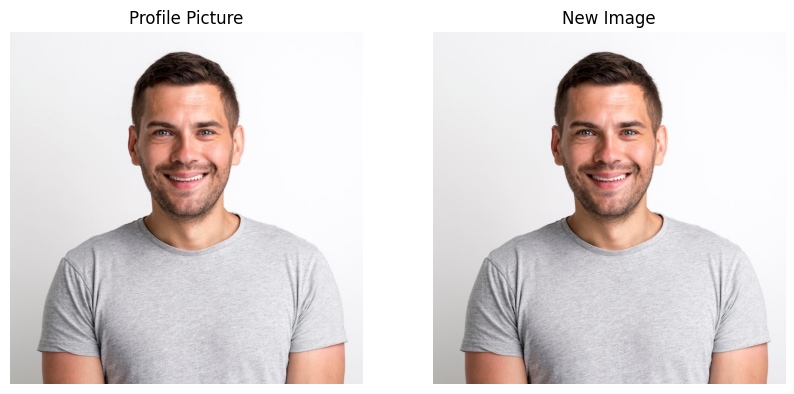

Status Code: 200
✅ Similarity Score: 97.34
✔️ Match? Yes (Threshold: 62.327)


In [19]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

import firebase_admin
from firebase_admin import credentials, firestore

# Initialize Firebase Admin SDK
if not firebase_admin._apps: 
    cred = credentials.Certificate('/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/classmate-ai-63d5b-firebase-adminsdk-dizo8-ee94ad30f2.json')
    firebase_admin.initialize_app(cred)

db = firestore.client()

def get_user_profile_picture(user_id):
    """
    Fetch the user document from Firestore and return profilePicture URL.
    """
    user_ref = db.collection('users').document(user_id)
    doc = user_ref.get()
    if doc.exists:
        data = doc.to_dict()
        return data.get('profilePicture')
    else:
        print(f"User {user_id} not found in Firestore.")
        return None

def compare_faces(image_url1, image_url2):
    """
    Call Face++ API to compare two face images by URLs.
    """
    url = "https://api-us.faceplusplus.com/facepp/v3/compare"
    api_key = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
    api_secret = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"

    response = requests.post(
        url,
        data={
            "api_key": api_key,
            "api_secret": api_secret,
            "image_url1": image_url1,
            "image_url2": image_url2
        }
    )

    print("Status Code:", response.status_code)

    try:
        result = response.json()
        if "error_message" in result:
            print("❌ Face++ Error:", result["error_message"])
            return None
        else:
            confidence = result.get("confidence", 0)
            threshold = result.get("thresholds", {}).get("1e-3", 75.0)  # fallback threshold
            print(f"✅ Similarity Score: {confidence}")
            print(f"✔️ Match? {'Yes' if confidence >= threshold else 'No'} (Threshold: {threshold})")
            return confidence, confidence >= threshold
    except Exception as e:
        print("❌ JSON Decode Failed:", e)
        print("Raw response:", response.text)
        return None

def show_images_side_by_side(url1, url2):
    """
    Download and show two images side-by-side.
    """
    try:
        response1 = requests.get(url1)
        img1 = Image.open(BytesIO(response1.content))

        response2 = requests.get(url2)
        img2 = Image.open(BytesIO(response2.content))

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1)
        axs[0].set_title("Profile Picture")
        axs[0].axis('off')

        axs[1].imshow(img2)
        axs[1].set_title("New Image")
        axs[1].axis('off')

        plt.show()

    except Exception as e:
        print("Error displaying images:", e)

def main():
    user_id = "7jQAbpD8u2g31DGLDAkNmeIEPbp2"

    profile_pic_url = get_user_profile_picture(user_id)
    if not profile_pic_url:
        print("No profile picture URL found.")
        return

    new_image_url = "https://img.freepik.com/free-photo/portrait-smiling-charming-young-man-grey-t-shirt-standing-against-plain-background_23-2148213406.jpg?semt=ais_hybrid&w=740"

    print("Comparing profile picture with new image...")

    show_images_side_by_side(profile_pic_url, new_image_url)

    compare_faces(profile_pic_url, new_image_url)

if __name__ == "__main__":
    main()


# second image from webcam

In [20]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tempfile

import firebase_admin
from firebase_admin import credentials, firestore

# Initialize Firebase Admin SDK
if not firebase_admin._apps: 
    cred = credentials.Certificate('/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/classmate-ai-63d5b-firebase-adminsdk-dizo8-ee94ad30f2.json')
    firebase_admin.initialize_app(cred)

db = firestore.client()

def get_user_profile_picture(user_id):
    user_ref = db.collection('users').document(user_id)
    doc = user_ref.get()
    if doc.exists:
        data = doc.to_dict()
        return data.get('profilePicture')
    else:
        print(f"User {user_id} not found in Firestore.")
        return None

def capture_webcam_image():
    """
    Capture an image from the webcam and save it temporarily.
    """
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("❌ Could not open webcam.")
        return None

    print("📸 Press 's' to capture image, or 'q' to quit.")
    while True:
        ret, frame = cap.read()
        cv2.imshow('Webcam - Press s to capture', frame)

        key = cv2.waitKey(1)
        if key == ord('s'):
            cap.release()
            cv2.destroyAllWindows()
            temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".jpg")
            cv2.imwrite(temp_file.name, frame)
            print(f"✅ Image captured: {temp_file.name}")
            return temp_file.name
        elif key == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            print("❌ Capture cancelled.")
            return None

def compare_faces(image_url1, image_path2):
    """
    Call Face++ API to compare one image by URL and another from local file.
    """
    url = "https://api-us.faceplusplus.com/facepp/v3/compare"
    api_key = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
    api_secret = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"

    with open(image_path2, 'rb') as f2:
        files = {
            'image_file2': f2
        }
        data = {
            "api_key": api_key,
            "api_secret": api_secret,
            "image_url1": image_url1
        }

        response = requests.post(url, data=data, files=files)

    print("Status Code:", response.status_code)

    try:
        result = response.json()
        if "error_message" in result:
            print("❌ Face++ Error:", result["error_message"])
            return None
        else:
            confidence = result.get("confidence", 0)
            threshold = result.get("thresholds", {}).get("1e-3", 75.0)
            print(f"✅ Similarity Score: {confidence}")
            print(f"✔️ Match? {'Yes' if confidence >= threshold else 'No'} (Threshold: {threshold})")
            return confidence, confidence >= threshold
    except Exception as e:
        print("❌ JSON Decode Failed:", e)
        print("Raw response:", response.text)
        return None

def show_images(profile_url, local_path):
    try:
        response = requests.get(profile_url)
        img1 = Image.open(BytesIO(response.content))

        img2 = Image.open(local_path)

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1)
        axs[0].set_title("Profile Picture")
        axs[0].axis('off')

        axs[1].imshow(img2)
        axs[1].set_title("Captured Image")
        axs[1].axis('off')

        plt.show()
    except Exception as e:
        print("Error displaying images:", e)

def main():
    user_id = "7jQAbpD8u2g31DGLDAkNmeIEPbp2"

    profile_pic_url = get_user_profile_picture(user_id)
    if not profile_pic_url:
        print("No profile picture URL found.")
        return

    webcam_image_path = capture_webcam_image()
    if not webcam_image_path:
        return

    show_images(profile_pic_url, webcam_image_path)

    compare_faces(profile_pic_url, webcam_image_path)

if __name__ == "__main__":
    main()


[05/21 20:30:09.239861][info][99529][Context.cpp:69] Context created with config: default config!
[05/21 20:30:09.239886][info][99529][Context.cpp:74] Context work_dir=/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra
[05/21 20:30:09.239888][info][99529][Context.cpp:77] 	- SDK version: 1.9.4
[05/21 20:30:09.239890][info][99529][Context.cpp:78] 	- SDK stage version: main
[05/21 20:30:09.239894][info][99529][Context.cpp:82] get config EnumerateNetDevice:false
[05/21 20:30:09.239896][info][99529][MacPal.cpp:36] createObPal: create MacPal!
[05/21 20:30:09.240327][info][99529][MacPal.cpp:104] Create PollingDeviceWatcher!
[05/21 20:30:09.240335][info][99529][DeviceManager.cpp:15] Current found device(s): (0)
[05/21 20:30:09.240338][info][99529][Pipeline.cpp:15] Try to create pipeline with default device.
[05/21 20:30:09.240340][warning][99529][ObException.cpp:5] No device found, fail to create pipeline!
[05/21 20:30:09.240807][info][99529][Context.cpp:90] Context 

OpenCV: not authorized to capture video (status 0), requesting...
OpenCV: camera failed to properly initialize!
[ WARN:0@0.851] global cap.cpp:323 open VIDEOIO(OBSENSOR): raised unknown C++ exception!




In [21]:
import cv2

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("❌ Cannot open camera")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Can't receive frame. Exiting...")
        break
    cv2.imshow('Press q to quit', frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


📷 Capturing new image from webcam...
📸 Press SPACE to capture an image... (ESC to exit)
✅ Image saved to /var/folders/0_/q7hlfhcn723fzh10jym7md6c0000gn/T/tmp5qr882th.jpg


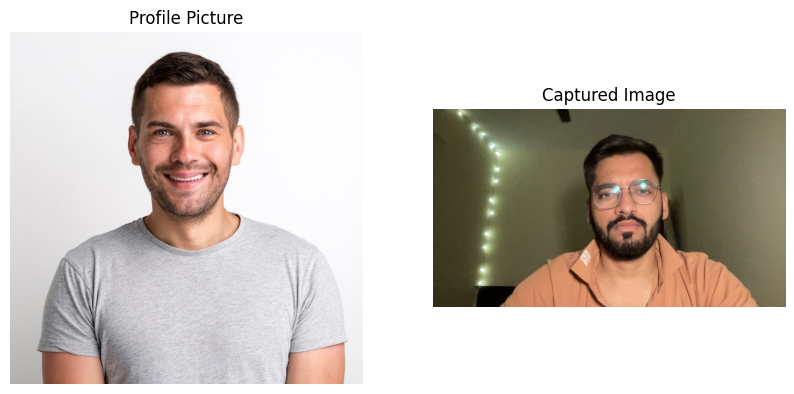

🧠 Comparing profile picture with captured image...
Status Code: 200
✅ Similarity Score: 49.911
✔️ Match? No (Threshold: 62.327)


In [1]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tempfile
import firebase_admin
from firebase_admin import credentials, firestore

# Initialize Firebase Admin SDK
if not firebase_admin._apps:
    cred = credentials.Certificate('/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/classmate-ai-63d5b-firebase-adminsdk-dizo8-ee94ad30f2.json')
    firebase_admin.initialize_app(cred)

db = firestore.client()

def get_user_profile_picture(user_id):
    """
    Fetch the user document from Firestore and return profilePicture URL.
    """
    user_ref = db.collection('users').document(user_id)
    doc = user_ref.get()
    if doc.exists:
        data = doc.to_dict()
        return data.get('profilePicture')
    else:
        print(f"User {user_id} not found in Firestore.")
        return None

def capture_image_from_camera():
    """
    Captures an image using the default front camera (0). Returns path to saved image.
    """
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("❌ Cannot open webcam")
        return None

    print("📸 Press SPACE to capture an image... (ESC to exit)")
    while True:
        ret, frame = cap.read()
        if not ret:
            print("❌ Failed to grab frame")
            break

        cv2.imshow("Capture Image", frame)
        key = cv2.waitKey(1)
        if key % 256 == 27:  # ESC pressed
            print("🚫 Capture cancelled.")
            cap.release()
            cv2.destroyAllWindows()
            return None
        elif key % 256 == 32:  # SPACE pressed
            break

    cap.release()
    cv2.destroyAllWindows()

    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    cv2.imwrite(temp_file.name, frame)
    print(f"✅ Image saved to {temp_file.name}")
    return temp_file.name

def compare_faces(image_url1, image_path2):
    """
    Call Face++ API to compare a face image URL with a local image file.
    """
    url = "https://api-us.faceplusplus.com/facepp/v3/compare"
    api_key = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
    api_secret = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"

    with open(image_path2, 'rb') as f:
        response = requests.post(
            url,
            data={
                "api_key": api_key,
                "api_secret": api_secret,
                "image_url1": image_url1
            },
            files={
                "image_file2": f
            }
        )

    print("Status Code:", response.status_code)

    try:
        result = response.json()
        if "error_message" in result:
            print("❌ Face++ Error:", result["error_message"])
            return None
        else:
            confidence = result.get("confidence", 0)
            threshold = result.get("thresholds", {}).get("1e-3", 75.0)
            print(f"✅ Similarity Score: {confidence}")
            print(f"✔️ Match? {'Yes' if confidence >= threshold else 'No'} (Threshold: {threshold})")
            return confidence, confidence >= threshold
    except Exception as e:
        print("❌ JSON Decode Failed:", e)
        print("Raw response:", response.text)
        return None

def show_images_side_by_side(url1, local_path2):
    """
    Display the Firebase image and captured image side by side.
    """
    try:
        response1 = requests.get(url1)
        img1 = Image.open(BytesIO(response1.content))

        img2 = Image.open(local_path2)

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1)
        axs[0].set_title("Profile Picture")
        axs[0].axis('off')

        axs[1].imshow(img2)
        axs[1].set_title("Captured Image")
        axs[1].axis('off')

        plt.show()

    except Exception as e:
        print("Error displaying images:", e)

def main():
    user_id = "7jQAbpD8u2g31DGLDAkNmeIEPbp2"

    profile_pic_url = get_user_profile_picture(user_id)
    if not profile_pic_url:
        print("No profile picture URL found.")
        return

    print("📷 Capturing new image from webcam...")
    captured_image_path = capture_image_from_camera()
    if not captured_image_path:
        return

    show_images_side_by_side(profile_pic_url, captured_image_path)

    print("🧠 Comparing profile picture with captured image...")
    compare_faces(profile_pic_url, captured_image_path)

if __name__ == "__main__":
    main()


🔄 Fetching user profile picture from Firebase...
📷 Opening webcam to capture image...
📸 Press SPACE to capture image, ESC to exit.
✅ Image saved to /var/folders/0_/q7hlfhcn723fzh10jym7md6c0000gn/T/tmpz5zblr1s.jpg
🖼️ Displaying both images...


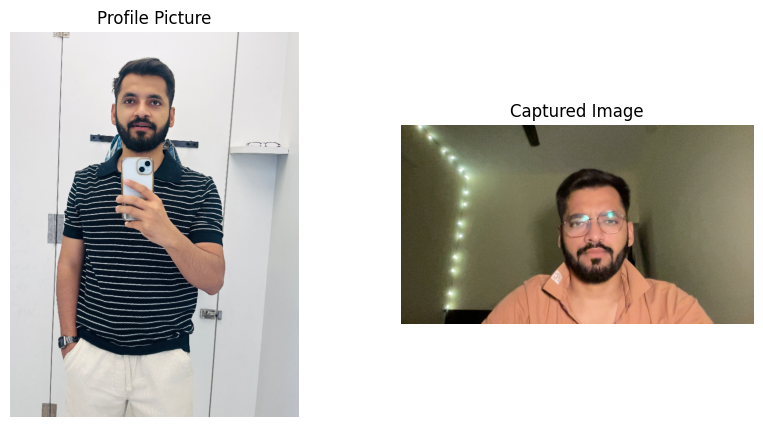

🤖 Comparing faces...
📡 Status Code: 200
✅ Similarity Score: 88.221
✔️ Match? Yes (Threshold: 62.327)


In [2]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tempfile

import firebase_admin
from firebase_admin import credentials, firestore

# 🔐 Initialize Firebase Admin SDK
if not firebase_admin._apps:
    cred = credentials.Certificate('/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/classmate-ai-63d5b-firebase-adminsdk-dizo8-ee94ad30f2.json')
    firebase_admin.initialize_app(cred)

db = firestore.client()

# 🔎 Fetch the profile picture URL from Firestore
def get_user_profile_picture(user_id):
    user_ref = db.collection('users').document(user_id)
    doc = user_ref.get()
    if doc.exists:
        data = doc.to_dict()
        return data.get('profilePicture')
    else:
        print(f"❌ User {user_id} not found in Firestore.")
        return None

# 📸 Capture an image from webcam (SPACE to capture)
def capture_image_from_camera():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("❌ Cannot open webcam")
        return None

    print("📸 Press SPACE to capture image, ESC to exit.")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("❌ Failed to grab frame")
            break

        cv2.imshow("Press SPACE to capture", frame)

        key = cv2.waitKey(1)
        if key % 256 == 27:  # ESC to exit
            print("🚪 Escape hit, closing...")
            cap.release()
            cv2.destroyAllWindows()
            return None
        elif key % 256 == 32:  # SPACE to capture
            break

    cap.release()
    cv2.destroyAllWindows()

    # Save to temp file
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    cv2.imwrite(temp_file.name, frame)
    print(f"✅ Image saved to {temp_file.name}")
    return temp_file.name

# 🤖 Face++ API comparison
def compare_faces(image_url1, image_path2):
    url = "https://api-us.faceplusplus.com/facepp/v3/compare"
    api_key = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
    api_secret = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"

    with open(image_path2, 'rb') as image_file:
        response = requests.post(
            url,
            data={
                "api_key": api_key,
                "api_secret": api_secret,
                "image_url1": image_url1,
            },
            files={"image_file2": image_file}
        )

    print("📡 Status Code:", response.status_code)

    try:
        result = response.json()
        if "error_message" in result:
            print("❌ Face++ Error:", result["error_message"])
            return None
        else:
            confidence = result.get("confidence", 0)
            threshold = result.get("thresholds", {}).get("1e-3", 75.0)
            print(f"✅ Similarity Score: {confidence}")
            print(f"✔️ Match? {'Yes' if confidence >= threshold else 'No'} (Threshold: {threshold})")
            return confidence, confidence >= threshold
    except Exception as e:
        print("❌ JSON Decode Failed:", e)
        print("Raw response:", response.text)
        return None

# 🖼️ Display both images side by side
def show_images_side_by_side(url1, path2):
    try:
        response1 = requests.get(url1)
        img1 = Image.open(BytesIO(response1.content))

        img2 = Image.open(path2)

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1)
        axs[0].set_title("Profile Picture")
        axs[0].axis('off')

        axs[1].imshow(img2)
        axs[1].set_title("Captured Image")
        axs[1].axis('off')

        plt.show()

    except Exception as e:
        print("⚠️ Error displaying images:", e)

# 🚀 Main function
def main():
    user_id = "7jQAbpD8u2g31DGLDAkNmeIEPbp2"

    print("🔄 Fetching user profile picture from Firebase...")
    profile_pic_url = get_user_profile_picture(user_id)
    if not profile_pic_url:
        print("❌ No profile picture URL found.")
        return

    print("📷 Opening webcam to capture image...")
    captured_image_path = capture_image_from_camera()
    if not captured_image_path:
        print("❌ No image captured.")
        return

    print("🖼️ Displaying both images...")
    show_images_side_by_side(profile_pic_url, captured_image_path)

    print("🤖 Comparing faces...")
    compare_faces(profile_pic_url, captured_image_path)

if __name__ == "__main__":
    main()


# main code with web cam capture and firebase image match 

📷 Capturing new image from webcam...
📸 Press SPACE to capture an image... (ESC to exit)
✅ Image saved to /var/folders/0_/q7hlfhcn723fzh10jym7md6c0000gn/T/tmpdeuw7cp1.jpg


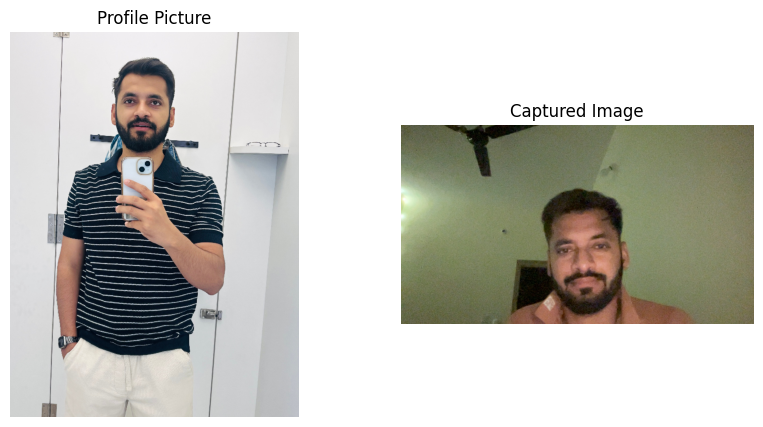

🧠 Comparing profile picture with captured image...
Status Code: 200
✅ Similarity Score: 90.679
✔️ Match? Yes (Threshold: 62.327)


In [3]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tempfile
import firebase_admin
from firebase_admin import credentials, firestore

# Initialize Firebase Admin SDK
if not firebase_admin._apps:
    cred = credentials.Certificate('/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/classmate-ai-63d5b-firebase-adminsdk-dizo8-ee94ad30f2.json')
    firebase_admin.initialize_app(cred)

db = firestore.client()

def get_user_profile_picture(user_id):
    """
    Fetch the user document from Firestore and return profilePicture URL.
    """
    user_ref = db.collection('users').document(user_id)
    doc = user_ref.get()
    if doc.exists:
        data = doc.to_dict()
        return data.get('profilePicture')
    else:
        print(f"User {user_id} not found in Firestore.")
        return None

def capture_image_from_camera():
    """
    Captures an image using the default front camera (0). Returns path to saved image.
    """
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("❌ Cannot open webcam")
        return None

    print("📸 Press SPACE to capture an image... (ESC to exit)")
    while True:
        ret, frame = cap.read()
        if not ret:
            print("❌ Failed to grab frame")
            break

        cv2.imshow("Capture Image", frame)
        key = cv2.waitKey(1)
        if key % 256 == 27:  # ESC pressed
            print("🚫 Capture cancelled.")
            cap.release()
            cv2.destroyAllWindows()
            return None
        elif key % 256 == 32:  # SPACE pressed
            break

    cap.release()
    cv2.destroyAllWindows()

    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    cv2.imwrite(temp_file.name, frame)
    print(f"✅ Image saved to {temp_file.name}")
    return temp_file.name

def compare_faces(image_url1, image_path2):
    """
    Call Face++ API to compare a face image URL with a local image file.
    """
    url = "https://api-us.faceplusplus.com/facepp/v3/compare"
    api_key = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
    api_secret = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"

    with open(image_path2, 'rb') as f:
        response = requests.post(
            url,
            data={
                "api_key": api_key,
                "api_secret": api_secret,
                "image_url1": image_url1
            },
            files={
                "image_file2": f
            }
        )

    print("Status Code:", response.status_code)

    try:
        result = response.json()
        if "error_message" in result:
            print("❌ Face++ Error:", result["error_message"])
            return None
        else:
            confidence = result.get("confidence", 0)
            threshold = result.get("thresholds", {}).get("1e-3", 75.0)
            print(f"✅ Similarity Score: {confidence}")
            print(f"✔️ Match? {'Yes' if confidence >= threshold else 'No'} (Threshold: {threshold})")
            return confidence, confidence >= threshold
    except Exception as e:
        print("❌ JSON Decode Failed:", e)
        print("Raw response:", response.text)
        return None

def show_images_side_by_side(url1, local_path2):
    """
    Display the Firebase image and captured image side by side.
    """
    try:
        response1 = requests.get(url1)
        img1 = Image.open(BytesIO(response1.content))

        img2 = Image.open(local_path2)

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1)
        axs[0].set_title("Profile Picture")
        axs[0].axis('off')

        axs[1].imshow(img2)
        axs[1].set_title("Captured Image")
        axs[1].axis('off')

        plt.show()

    except Exception as e:
        print("Error displaying images:", e)

def main():
    user_id = "7jQAbpD8u2g31DGLDAkNmeIEPbp2"

    profile_pic_url = get_user_profile_picture(user_id)
    if not profile_pic_url:
        print("No profile picture URL found.")
        return

    print("📷 Capturing new image from webcam...")
    captured_image_path = capture_image_from_camera()
    if not captured_image_path:
        return

    show_images_side_by_side(profile_pic_url, captured_image_path)

    print("🧠 Comparing profile picture with captured image...")
    compare_faces(profile_pic_url, captured_image_path)

if __name__ == "__main__":
    main()


In [2]:
from flask import Flask, request, jsonify
import base64
import requests
import firebase_admin
from firebase_admin import credentials, firestore

# Initialize Firebase Admin SDK (use your own service account key JSON)
cred = credentials.Certificate('/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/classmate-ai-63d5b-firebase-adminsdk-dizo8-ee94ad30f2.json')
firebase_admin.initialize_app(cred)
db = firestore.client()

app = Flask(__name__)

# Face++ API credentials - replace with your keys
FACEPP_API_KEY = 's3OsuhETdH9eujyOSJMVOmZNCrXL7e2q'
FACEPP_API_SECRET = '4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE'


def compare_faces(image_base64, user_face_url):
    """Call Face++ API to compare two faces."""
    url = 'https://api-us.faceplusplus.com/facepp/v3/compare'

    files = {
        'image_base64_1': image_base64,
        'image_url_2': user_face_url
    }

    data = {
        'api_key': FACEPP_API_KEY,
        'api_secret': FACEPP_API_SECRET,
    }

    # Face++ requires multipart/form-data, so send data + files properly
    # But base64 is a string, so send as data field, not files.
    # Adjust call accordingly.

    # Face++ docs specify to send image_base64_1 as form-data string param.
    # So we use data param, not files.

    payload = {
        'api_key': FACEPP_API_KEY,
        'api_secret': FACEPP_API_SECRET,
        'image_base64_1': image_base64,
        'image_url_2': user_face_url
    }

    response = requests.post(url, data=payload)
    return response.json()

@app.route('/api/compare-face', methods=['POST'])
def compare_face():
    try:
        data = request.get_json()
        user_id = data.get('userId')
        selfie_base64 = data.get('selfie')
        location = data.get('location')

        if not user_id or not selfie_base64:
            return jsonify({'error': 'Missing userId or selfie'}), 400

        # Fetch user profile image URL from Firestore
        user_doc = db.collection('users').document(user_id).get()
        if not user_doc.exists:
            return jsonify({'error': 'User not found'}), 404

        user_data = user_doc.to_dict()
        user_face_url = user_data.get('profileImageUrl')  # Assuming stored here

        if not user_face_url:
            return jsonify({'error': 'User profile image not found'}), 404

        # selfie_base64 contains "data:image/png;base64,...."
        # Strip prefix if present for Face++ API
        if selfie_base64.startswith('data:image'):
            selfie_base64 = selfie_base64.split(',')[1]

        # Call Face++ API to compare faces
        result = compare_faces(selfie_base64, user_face_url)

        # Check Face++ response
        if 'confidence' in result:
            confidence = result['confidence']
            threshold = 80  # Adjust threshold as needed

            if confidence >= threshold:
                return jsonify({'match': True, 'confidence': confidence})
            else:
                return jsonify({'match': False, 'confidence': confidence, 'message': 'Face does not match'})
        else:
            # Face++ error
            return jsonify({'error': 'Face++ API error', 'details': result}), 500

    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/harshkumar/.pyenv/versions/3.12.4/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/harshkumar/.pyenv/versions/3.12.4/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/Users/harshkumar/.pyenv/versions/3.12.4/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/harshkumar/.pyenv/versions/3.12.4/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 692, in initialize
    self.init_sockets()
  File "/Users/harshkumar/.pyenv/versions/3.12.4/lib/python3.12/site-packages/ipykernel/kernelapp

SystemExit: 1

/Users/harshkumar/.pyenv/versions/3.12.4/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# removing the static image 

📷 Capturing new image from webcam...
🔍 Checking for motion to verify liveness...
Motion detection average diff: 4533970.5
📸 Press SPACE to capture an image... (ESC to exit)
✅ Image saved to /var/folders/0_/q7hlfhcn723fzh10jym7md6c0000gn/T/tmp3gs4klo9.jpg


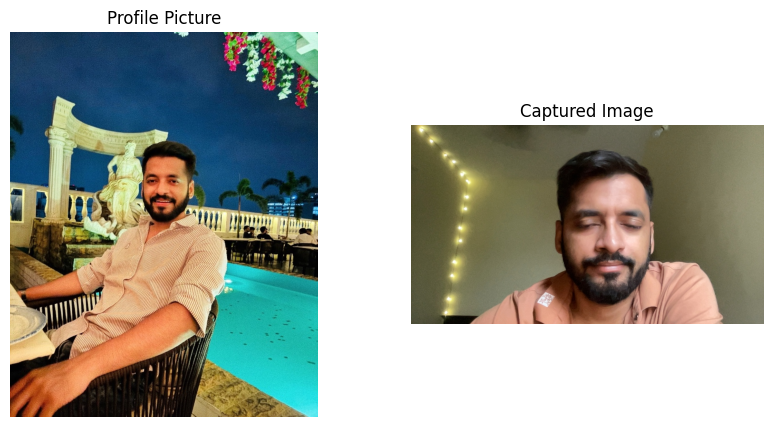

🧠 Comparing profile picture with captured image...
Status Code: 200
✅ Similarity Score: 92.802
✔️ Match? Yes (Threshold: 62.327)


In [9]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tempfile
import firebase_admin
from firebase_admin import credentials, firestore
import numpy as np

# Initialize Firebase Admin SDK
if not firebase_admin._apps:
    cred = credentials.Certificate('/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/classmate-ai-63d5b-firebase-adminsdk-dizo8-ee94ad30f2.json')
    firebase_admin.initialize_app(cred)

db = firestore.client()

def get_user_profile_picture(user_id):
    user_ref = db.collection('users').document(user_id)
    doc = user_ref.get()
    if doc.exists:
        data = doc.to_dict()
        return data.get('profilePicture')
    else:
        print(f"User {user_id} not found in Firestore.")
        return None

def detect_motion(cap, frame_count=5, threshold=10000):
    """
    Capture multiple frames and calculate average pixel difference to detect motion.
    Returns True if motion detected, else False.
    """
    frames = []
    for _ in range(frame_count):
        ret, frame = cap.read()
        if not ret:
            print("❌ Failed to grab frame for motion detection")
            return False
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)
        cv2.waitKey(100)  # wait 100 ms

    diffs = []
    for i in range(len(frames) - 1):
        diff = cv2.absdiff(frames[i], frames[i + 1])
        diffs.append(np.sum(diff))

    avg_diff = sum(diffs) / len(diffs)
    print(f"Motion detection average diff: {avg_diff}")
    return avg_diff > threshold

def capture_image_from_camera():
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("❌ Cannot open webcam")
        return None

    print("🔍 Checking for motion to verify liveness...")
    if not detect_motion(cap):
        print("❌ No motion detected! Please move your head or blink before capturing.")
        cap.release()
        return None

    print("📸 Press SPACE to capture an image... (ESC to exit)")
    while True:
        ret, frame = cap.read()
        if not ret:
            print("❌ Failed to grab frame")
            break

        cv2.imshow("Capture Image", frame)
        key = cv2.waitKey(1)
        if key % 256 == 27:  # ESC pressed
            print("🚫 Capture cancelled.")
            cap.release()
            cv2.destroyAllWindows()
            return None
        elif key % 256 == 32:  # SPACE pressed
            break

    cap.release()
    cv2.destroyAllWindows()

    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    cv2.imwrite(temp_file.name, frame)
    print(f"✅ Image saved to {temp_file.name}")
    return temp_file.name

def compare_faces(image_url1, image_path2):
    url = "https://api-us.faceplusplus.com/facepp/v3/compare"
    api_key = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
    api_secret = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"

    with open(image_path2, 'rb') as f:
        response = requests.post(
            url,
            data={
                "api_key": api_key,
                "api_secret": api_secret,
                "image_url1": image_url1
            },
            files={
                "image_file2": f
            }
        )

    print("Status Code:", response.status_code)

    try:
        result = response.json()
        if "error_message" in result:
            print("❌ Face++ Error:", result["error_message"])
            return None
        else:
            confidence = result.get("confidence", 0)
            threshold = result.get("thresholds", {}).get("1e-3", 75.0)
            print(f"✅ Similarity Score: {confidence}")
            print(f"✔️ Match? {'Yes' if confidence >= threshold else 'No'} (Threshold: {threshold})")
            return confidence, confidence >= threshold
    except Exception as e:
        print("❌ JSON Decode Failed:", e)
        print("Raw response:", response.text)
        return None

def show_images_side_by_side(url1, local_path2):
    try:
        response1 = requests.get(url1)
        img1 = Image.open(BytesIO(response1.content))

        img2 = Image.open(local_path2)

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1)
        axs[0].set_title("Profile Picture")
        axs[0].axis('off')

        axs[1].imshow(img2)
        axs[1].set_title("Captured Image")
        axs[1].axis('off')

        plt.show()

    except Exception as e:
        print("Error displaying images:", e)

def main():
    user_id = "7jQAbpD8u2g31DGLDAkNmeIEPbp2"

    profile_pic_url = get_user_profile_picture(user_id)
    if not profile_pic_url:
        print("No profile picture URL found.")
        return

    print("📷 Capturing new image from webcam...")
    captured_image_path = capture_image_from_camera()
    if not captured_image_path:
        return

    show_images_side_by_side(profile_pic_url, captured_image_path)

    print("🧠 Comparing profile picture with captured image...")
    compare_faces(profile_pic_url, captured_image_path)

if __name__ == "__main__":
    main()


In [10]:
import cv2
import dlib
import numpy as np
from scipy.spatial import distance as dist

def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

def blink_detection():
    EYE_AR_THRESH = 0.25
    EYE_AR_CONSEC_FRAMES = 3
    COUNTER = 0
    TOTAL = 0

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/shape_predictor_68_face_landmarks.dat")

    (lStart, lEnd) = (42, 48)
    (rStart, rEnd) = (36, 42)

    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("❌ Cannot open webcam")
        return False

    print("👀 Please blink naturally several times to verify liveness.")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        rects = detector(gray, 0)

        for rect in rects:
            shape = predictor(gray, rect)
            shape = [(shape.part(i).x, shape.part(i).y) for i in range(68)]

            leftEye = shape[lStart:lEnd]
            rightEye = shape[rStart:rEnd]

            leftEAR = eye_aspect_ratio(leftEye)
            rightEAR = eye_aspect_ratio(rightEye)

            ear = (leftEAR + rightEAR) / 2.0

            if ear < EYE_AR_THRESH:
                COUNTER += 1
            else:
                if COUNTER >= EYE_AR_CONSEC_FRAMES:
                    TOTAL += 1
                    print(f"Blink detected: {TOTAL}")
                COUNTER = 0

        cv2.putText(frame, f"Blinks: {TOTAL}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        cv2.imshow("Blink Detection", frame)
        key = cv2.waitKey(1) & 0xFF

        if TOTAL >= 3:
            print("✅ Liveness confirmed by blinking.")
            cap.release()
            cv2.destroyAllWindows()
            return True

        if key == 27:  # ESC key to quit
            print("🚫 Liveness check cancelled.")
            break

    cap.release()
    cv2.destroyAllWindows()
    return False


In [5]:
import requests
import cv2
import tempfile
import firebase_admin
from firebase_admin import credentials, firestore
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# Initialize Firebase Admin SDK
if not firebase_admin._apps:
    cred = credentials.Certificate('/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/classmate-ai-63d5b-firebase-adminsdk-dizo8-ee94ad30f2.json')
    firebase_admin.initialize_app(cred)

db = firestore.client()

# Face++ API keys
API_KEY = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
API_SECRET = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"

# 🔹 Get user's profile picture from Firebase
def get_user_profile_picture(user_id):
    user_ref = db.collection('users').document(user_id)
    doc = user_ref.get()
    if doc.exists:
        data = doc.to_dict()
        return data.get('profilePicture')
    else:
        print(f"User {user_id} not found.")
        return None

# 🔹 Capture short video for liveness detection
def capture_short_video(output_path='liveness_video.mp4', duration=3):
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("❌ Cannot open webcam")
        return None

    fps = 20.0
    width = int(cap.get(3))
    height = int(cap.get(4))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    print("🎥 Recording video for liveness detection...")
    frame_count = 0
    max_frames = int(duration * fps)

    while frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        out.write(frame)
        cv2.imshow('Liveness Capture', frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break
        frame_count += 1

    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print(f"✅ Video saved to {output_path}")
    return output_path

# 🔹 Liveness detection with Face++ API
def check_liveness_faceplusplus(video_path):
    url = "https://api-us.faceplusplus.com/facepp/v1/sdk/livenessverfication"

    files = {
        'video_file': open(video_path, 'rb')
    }
    data = {
        'api_key': API_KEY,
        'api_secret': API_SECRET
    }

    print("🧠 Checking liveness with Face++...")
    response = requests.post(url, files=files, data=data)

    if response.status_code != 200:
        print("❌ Liveness API Error:", response.status_code, response.text)
        return False

    result = response.json()
    print("📋 Liveness API Response:", result)

    return result.get("liveness_result") == "live"

# 🔹 Capture a still image for face comparison
def capture_image_from_camera():
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("❌ Cannot open webcam")
        return None

    print("📸 Press SPACE to capture an image (ESC to exit)")
    while True:
        ret, frame = cap.read()
        if not ret:
            print("❌ Failed to grab frame")
            break

        cv2.imshow("Capture Image", frame)
        key = cv2.waitKey(1)
        if key % 256 == 27:
            print("🚫 Capture cancelled.")
            cap.release()
            cv2.destroyAllWindows()
            return None
        elif key % 256 == 32:
            break

    cap.release()
    cv2.destroyAllWindows()

    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    cv2.imwrite(temp_file.name, frame)
    print(f"✅ Image saved to {temp_file.name}")
    return temp_file.name

# 🔹 Compare captured face with profile picture using Face++
def compare_faces(image_url1, image_path2):
    url = "https://api-us.faceplusplus.com/facepp/v3/compare"

    with open(image_path2, 'rb') as f:
        response = requests.post(
            url,
            data={
                "api_key": API_KEY,
                "api_secret": API_SECRET,
                "image_url1": image_url1
            },
            files={"image_file2": f}
        )

    print("🔁 Comparing faces...")
    if response.status_code != 200:
        print("❌ Error comparing faces:", response.status_code)
        return None

    result = response.json()
    if "error_message" in result:
        print("❌ Face++ Error:", result["error_message"])
        return None

    confidence = result.get("confidence", 0)
    threshold = result.get("thresholds", {}).get("1e-3", 75.0)

    print(f"✅ Similarity Score: {confidence}")
    print(f"✔️ Match? {'Yes' if confidence >= threshold else 'No'} (Threshold: {threshold})")

    return confidence, confidence >= threshold

# 🔹 Display both images side-by-side
def show_images_side_by_side(url1, local_path2):
    try:
        response1 = requests.get(url1)
        img1 = Image.open(BytesIO(response1.content))
        img2 = Image.open(local_path2)

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1)
        axs[0].set_title("Profile Picture")
        axs[0].axis('off')

        axs[1].imshow(img2)
        axs[1].set_title("Captured Image")
        axs[1].axis('off')

        plt.show()
    except Exception as e:
        print("❌ Error showing images:", e)

# 🔹 Main flow
def main():
    user_id = "7jQAbpD8u2g31DGLDAkNmeIEPbp2"

    profile_pic_url = get_user_profile_picture(user_id)
    if not profile_pic_url:
        print("No profile picture found.")
        return

    video_path = capture_short_video()
    if not video_path:
        return

    if not check_liveness_faceplusplus(video_path):
        print("🚫 Liveness check failed. Cannot proceed.")
        return

    captured_image_path = capture_image_from_camera()
    if not captured_image_path:
        return

    show_images_side_by_side(profile_pic_url, captured_image_path)

    compare_faces(profile_pic_url, captured_image_path)

if __name__ == "__main__":
    main()


🎥 Recording video for liveness detection...
✅ Video saved to liveness_video.mp4
🧠 Checking liveness with Face++...
❌ Liveness API Error: 413 <html>
<head><title>413 Request Entity Too Large</title></head>
<body bgcolor="white">
<center><h1>413 Request Entity Too Large</h1></center>
<hr><center>nginx/1.13.3</center>
</body>
</html>

🚫 Liveness check failed. Cannot proceed.


In [8]:
import cv2
import requests
import os

# Face++ credentials
API_KEY = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
API_SECRET = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"
FACEPP_LIVENESS_URL = 'https://api-us.faceplusplus.com/facepp/v3/liveness'

# Step 1: Record a short video (2 seconds, 320x240 resolution, low fps)
def capture_short_video(output_path='liveness_video.mp4', duration=2):
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("❌ Cannot open webcam")
        return None

    # Lower resolution
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

    # Lower FPS
    fps = 10.0
    width = int(cap.get(3))
    height = int(cap.get(4))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    print("🎥 Recording video for liveness detection...")
    frame_count = 0
    max_frames = int(duration * fps)

    while frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        out.write(frame)
        frame_count += 1
        cv2.imshow('Recording...', frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

    print(f"✅ Video saved to {output_path}")
    return output_path

# Step 2: Send video to Face++ for liveness detection
def check_liveness_faceplusplus(video_path):
    print("🧠 Checking liveness with Face++...")

    try:
        with open(video_path, 'rb') as video_file:
            response = requests.post(
                FACEPP_LIVENESS_URL,
                data={
                    'api_key': API_KEY,
                    'api_secret': API_SECRET,
                    'return_attributes': 'eye_status,headpose'
                },
                files={
                    'video_file': video_file
                }
            )

        if response.status_code != 200:
            print(f"❌ Liveness API Error: {response.status_code}")
            print(response.text)
            return False

        result = response.json()
        print("✅ Response received:")
        print(result)

        if result.get('liveness') == 'alive':
            print("✔️ Liveness confirmed by Face++.")
            return True
        else:
            print("❌ Liveness check failed.")
            return False

    except Exception as e:
        print("❌ Exception during API request:", e)
        return False

# Step 3: Main function
def main():
    video_path = capture_short_video()
    if video_path is None:
        print("🚫 Failed to record video.")
        return

    is_alive = check_liveness_faceplusplus(video_path)
    if is_alive:
        print("🎉 Proceed with identity verification.")
    else:
        print("🚫 Liveness verification failed.")

    # Clean up video file
    if os.path.exists(video_path):
        os.remove(video_path)

if __name__ == '__main__':
    main()


🎥 Recording video for liveness detection...
✅ Video saved to liveness_video.mp4
🧠 Checking liveness with Face++...
❌ Liveness API Error: 404
{"error_message":"API_NOT_FOUND"}

🚫 Liveness verification failed.


# nose allignment 

In [11]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tempfile
import firebase_admin
from firebase_admin import credentials, firestore
import numpy as np
import dlib
from scipy.spatial import distance as dist

# Initialize Firebase Admin SDK
if not firebase_admin._apps:
    cred = credentials.Certificate('/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/classmate-ai-63d5b-firebase-adminsdk-dizo8-ee94ad30f2.json')
    firebase_admin.initialize_app(cred)

db = firestore.client()

def get_user_profile_picture(user_id):
    user_ref = db.collection('users').document(user_id)
    doc = user_ref.get()
    if doc.exists:
        data = doc.to_dict()
        return data.get('profilePicture')
    else:
        print(f"User {user_id} not found in Firestore.")
        return None

def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

# Nose alignment parameters
TARGET_NOSE_POS = (320, 240)  # target position in the frame (center for 640x480)
NOSE_ALIGN_THRESH = 15        # pixels tolerance

def draw_nose_guide(frame, detected_nose_pos):
    # Draw the target circle (green)
    cv2.circle(frame, TARGET_NOSE_POS, 10, (0, 255, 0), 2)
    
    # Draw detected nose position (red dot)
    cv2.circle(frame, detected_nose_pos, 5, (0, 0, 255), -1)
    
    # Calculate offset
    offset_x = detected_nose_pos[0] - TARGET_NOSE_POS[0]
    offset_y = detected_nose_pos[1] - TARGET_NOSE_POS[1]

    # Show direction hints if outside threshold
    if abs(offset_x) > NOSE_ALIGN_THRESH or abs(offset_y) > NOSE_ALIGN_THRESH:
        direction = []
        if offset_x > NOSE_ALIGN_THRESH:
            direction.append("Move Left")
        elif offset_x < -NOSE_ALIGN_THRESH:
            direction.append("Move Right")
        if offset_y > NOSE_ALIGN_THRESH:
            direction.append("Move Up")
        elif offset_y < -NOSE_ALIGN_THRESH:
            direction.append("Move Down")

        cv2.putText(frame, ", ".join(direction), (10, 70),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        return False
    else:
        cv2.putText(frame, "Nose aligned! Please blink naturally.", (10, 70),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        return True

def blink_and_capture():
    EYE_AR_THRESH = 0.25
    EYE_AR_CONSEC_FRAMES = 3
    COUNTER = 0
    TOTAL = 0

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/shape_predictor_68_face_landmarks.dat")

    (lStart, lEnd) = (42, 48)
    (rStart, rEnd) = (36, 42)

    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("❌ Cannot open webcam")
        return None

    print("👀 Please align your nose with the green circle.")
    print("Then blink naturally several times to verify liveness.")

    captured_frame = None
    liveness_confirmed = False

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.resize(frame, (640, 480))  # ensure frame size

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        rects = detector(gray, 0)

        nose_aligned = False
        for rect in rects:
            shape = predictor(gray, rect)
            shape = [(shape.part(i).x, shape.part(i).y) for i in range(68)]

            # Nose tip landmark index is 30
            nose_tip = shape[30]

            nose_aligned = draw_nose_guide(frame, nose_tip)

            if nose_aligned:
                leftEye = shape[lStart:lEnd]
                rightEye = shape[rStart:rEnd]

                leftEAR = eye_aspect_ratio(leftEye)
                rightEAR = eye_aspect_ratio(rightEye)

                ear = (leftEAR + rightEAR) / 2.0

                if ear < EYE_AR_THRESH:
                    COUNTER += 1
                else:
                    if COUNTER >= EYE_AR_CONSEC_FRAMES:
                        TOTAL += 1
                        print(f"Blink detected: {TOTAL}")
                    COUNTER = 0

        cv2.putText(frame, f"Blinks: {TOTAL}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        if not liveness_confirmed:
            if TOTAL >= 3 and nose_aligned:
                print("✅ Liveness confirmed by blinking.")
                liveness_confirmed = True
                print("📸 Press SPACE to capture your image, or ESC to cancel.")
        else:
            cv2.putText(frame, "Press SPACE to capture or ESC to exit", (10, 60),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        cv2.imshow("Nose Alignment & Liveness Detection", frame)
        key = cv2.waitKey(1) & 0xFF

        if key == 27:  # ESC key
            print("🚫 Operation cancelled.")
            break

        if liveness_confirmed and key == 32:  # SPACE key
            captured_frame = frame.copy()
            print("✅ Image captured.")
            break

    cap.release()
    cv2.destroyAllWindows()

    if captured_frame is not None:
        temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
        cv2.imwrite(temp_file.name, captured_frame)
        print(f"✅ Image saved to {temp_file.name}")
        return temp_file.name
    else:
        return None

def compare_faces(image_url1, image_path2):
    url = "https://api-us.faceplusplus.com/facepp/v3/compare"
    api_key = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
    api_secret = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"

    with open(image_path2, 'rb') as f:
        response = requests.post(
            url,
            data={
                "api_key": api_key,
                "api_secret": api_secret,
                "image_url1": image_url1
            },
            files={
                "image_file2": f
            }
        )

    print("Status Code:", response.status_code)

    try:
        result = response.json()
        if "error_message" in result:
            print("❌ Face++ Error:", result["error_message"])
            return None
        else:
            confidence = result.get("confidence", 0)
            threshold = result.get("thresholds", {}).get("1e-3", 75.0)
            print(f"✅ Similarity Score: {confidence}")
            print(f"✔️ Match? {'Yes' if confidence >= threshold else 'No'} (Threshold: {threshold})")
            return confidence, confidence >= threshold
    except Exception as e:
        print("❌ JSON Decode Failed:", e)
        print("Raw response:", response.text)
        return None

def show_images_side_by_side(url1, local_path2):
    try:
        response1 = requests.get(url1)
        img1 = Image.open(BytesIO(response1.content))

        img2 = Image.open(local_path2)

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1)
        axs[0].set_title("Profile Picture")
        axs[0].axis('off')

        axs[1].imshow(img2)
        axs[1].set_title("Captured Image")
        axs[1].axis('off')

        plt.show()

    except Exception as e:
        print("Error displaying images:", e)

def main():
    user_id = "7jQAbpD8u2g31DGLDAkNmeIEPbp2"

    profile_pic_url = get_user_profile_picture(user_id)
    if not profile_pic_url:
        print("No profile picture URL found.")
        return

    captured_image_path = blink_and_capture()
    if not captured_image_path:
        print("❌ Liveness check failed or capture cancelled. Cannot proceed.")
        return

    show_images_side_by_side(profile_pic_url, captured_image_path)

    print("🧠 Comparing profile picture with captured image...")
    compare_faces(profile_pic_url, captured_image_path)

if __name__ == "__main__":
    main()


👀 Please align your nose with the green circle.
Then blink naturally several times to verify liveness.
🚫 Operation cancelled.
❌ Liveness check failed or capture cancelled. Cannot proceed.


In [3]:
import cv2
import dlib
import numpy as np
from scipy.spatial import distance as dist
import tempfile

# Eye aspect ratio for blink detection
def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    return (A + B) / (2.0 * C)

# Align face based on eye positions
def align_face(frame, shape):
    left_eye_pts = np.array(shape[42:48])
    right_eye_pts = np.array(shape[36:42])

    left_eye_center = left_eye_pts.mean(axis=0).astype("int")
    right_eye_center = right_eye_pts.mean(axis=0).astype("int")

    dy = left_eye_center[1] - right_eye_center[1]
    dx = left_eye_center[0] - right_eye_center[0]
    angle = np.degrees(np.arctan2(dy, dx))

    eyes_center = ((left_eye_center[0] + right_eye_center[0]) // 2,
                   (left_eye_center[1] + right_eye_center[1]) // 2)

    M = cv2.getRotationMatrix2D(eyes_center, angle, 1.0)
    (h, w) = frame.shape[:2]
    aligned_frame = cv2.warpAffine(frame, M, (w, h), flags=cv2.INTER_CUBIC)

    return aligned_frame, M

# Transform landmarks according to rotation matrix M
def transform_landmarks(landmarks, M):
    points = np.array(landmarks)
    ones = np.ones(shape=(len(points), 1))
    points_ones = np.hstack([points, ones])
    transformed_points = M.dot(points_ones.T).T
    return transformed_points.astype(int)

def blink_and_capture():
    EYE_AR_THRESH = 0.25
    EYE_AR_CONSEC_FRAMES = 3
    COUNTER = 0
    TOTAL = 0

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    (lStart, lEnd) = (42, 48)
    (rStart, rEnd) = (36, 42)
    nose_point_index = 30  # Nose tip landmark index

    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("❌ Cannot open webcam")
        return None

    print("👀 Please blink naturally 3 times and align your nose inside the circle.")

    captured_frame = None
    liveness_confirmed = False

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        rects = detector(gray, 0)

        if len(rects) > 0:
            rect = rects[0]  # Use first detected face
            shape = predictor(gray, rect)
            shape = [(shape.part(i).x, shape.part(i).y) for i in range(68)]

            # Align face
            aligned_frame, M = align_face(frame, shape)

            # Transform landmarks according to alignment
            aligned_landmarks = transform_landmarks(shape, M)

            # Extract eyes landmarks on aligned frame
            leftEye = aligned_landmarks[lStart:lEnd]
            rightEye = aligned_landmarks[rStart:rEnd]

            leftEAR = eye_aspect_ratio(leftEye)
            rightEAR = eye_aspect_ratio(rightEye)
            ear = (leftEAR + rightEAR) / 2.0

            if ear < EYE_AR_THRESH:
                COUNTER += 1
            else:
                if COUNTER >= EYE_AR_CONSEC_FRAMES:
                    TOTAL += 1
                    print(f"Blink detected: {TOTAL}")
                COUNTER = 0

            # Nose tip position on aligned frame
            nose_x, nose_y = aligned_landmarks[nose_point_index]

            # Draw circle at fixed position (nose alignment target)
            nose_center_x = aligned_frame.shape[1] // 2
            nose_center_y = aligned_frame.shape[0] // 2 + 30  # Slightly lower center
            radius = 40
            color = (0, 255, 0)
            thickness = 2

            cv2.circle(aligned_frame, (nose_center_x, nose_center_y), radius, color, thickness)

            # Check if nose is inside circle
            dist_nose = np.linalg.norm(np.array([nose_x, nose_y]) - np.array([nose_center_x, nose_center_y]))
            if dist_nose < radius:
                nose_aligned = True
                cv2.putText(aligned_frame, "Nose aligned ✓", (10, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            else:
                nose_aligned = False
                cv2.putText(aligned_frame, "Align your nose in the circle", (10, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

            # Display blink count
            cv2.putText(aligned_frame, f"Blinks: {TOTAL}", (10, 60),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

            # Check liveness condition: 3 blinks + nose aligned
            if not liveness_confirmed:
                if TOTAL >= 3 and nose_aligned:
                    print("✅ Liveness confirmed: 3 blinks + nose aligned")
                    liveness_confirmed = True
                    print("📸 Press SPACE to capture, or ESC to cancel")
            else:
                cv2.putText(aligned_frame, "Press SPACE to capture or ESC to exit", (10, 90),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

            cv2.imshow("Liveness Detection - Face Aligned", aligned_frame)

        else:
            cv2.putText(frame, "No face detected", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            cv2.imshow("Liveness Detection - Face Aligned", frame)

        key = cv2.waitKey(1) & 0xFF

        if key == 27:  # ESC
            print("🚫 Operation cancelled.")
            break

        if liveness_confirmed and key == 32:  # SPACE
            # Save the aligned frame at capture moment
            captured_frame = aligned_frame.copy()
            print("✅ Image captured.")
            break

    cap.release()
    cv2.destroyAllWindows()

    if captured_frame is not None:
        temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
        cv2.imwrite(temp_file.name, captured_frame)
        print(f"✅ Image saved to {temp_file.name}")
        return temp_file.name
    else:
        return None

if __name__ == "__main__":
    blink_and_capture()


👀 Please blink naturally 3 times and align your nose inside the circle.


TypeError: Can't parse 'center'. Sequence item with index 0 has a wrong type

In [ ]:
import cv2
import dlib
import numpy as np
from scipy.spatial import distance as dist

# Load face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# 3D model points for head pose estimation (nose tip, chin, eyes, mouth corners)
model_points = np.array([
    (0.0, 0.0, 0.0),             # Nose tip
    (0.0, -330.0, -65.0),        # Chin
    (-225.0, 170.0, -135.0),     # Left eye left corner
    (225.0, 170.0, -135.0),      # Right eye right corner
    (-150.0, -150.0, -125.0),    # Left Mouth corner
    (150.0, -150.0, -125.0)      # Right mouth corner
])

# Camera internals (you should calibrate your camera for better accuracy)
size = (640, 480)
focal_length = size[1]
center = (size[1] / 2, size[0] / 2)
camera_matrix = np.array(
    [[focal_length, 0, center[0]],
     [0, focal_length, center[1]],
     [0, 0, 1]], dtype="double"
)

dist_coeffs = np.zeros((4, 1))  # Assuming no lens distortion

def draw_axis(img, imgpts):
    imgpts = np.int32(imgpts).reshape(-1, 2)
    # Draw lines for axis
    img = cv2.line(img, tuple(imgpts[0]), tuple(imgpts[1]), (0,0,255), 3) # X axis - red
    img = cv2.line(img, tuple(imgpts[0]), tuple(imgpts[2]), (0,255,0), 3) # Y axis - green
    img = cv2.line(img, tuple(imgpts[0]), tuple(imgpts[3]), (255,0,0), 3) # Z axis - blue
    return img

def main():
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            shape = predictor(gray, face)
            shape_np = np.array([[p.x, p.y] for p in shape.parts()])

            # 2D image points from detected landmarks
            image_points = np.array([
                shape_np[30],     # Nose tip
                shape_np[8],      # Chin
                shape_np[36],     # Left eye left corner
                shape_np[45],     # Right eye right corner
                shape_np[48],     # Left Mouth corner
                shape_np[54]      # Right mouth corner
            ], dtype="double")

            # SolvePnP to get rotation and translation vectors
            success, rotation_vector, translation_vector = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs)

            # Project 3D points to 2D image plane to draw axes
            axis_length = 100
            axis_3d_points = np.float32([
                [axis_length,0,0],  # X axis (red)
                [0,axis_length,0],  # Y axis (green)
                [0,0,axis_length]   # Z axis (blue)
            ]).reshape(-1,3)

            imgpts, _ = cv2.projectPoints(axis_3d_points, rotation_vector, translation_vector, camera_matrix, dist_coeffs)

            # Draw face landmarks (optional)
            for (x,y) in shape_np:
                cv2.circle(frame, (x,y), 1, (0,255,0), -1)

            # Draw axis on face
            frame = draw_axis(frame, np.vstack((image_points[0], imgpts)))

        cv2.imshow("3D Face Pose Estimation", frame)
        key = cv2.waitKey(1)
        if key == 27:  # ESC to quit
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

: 

👀 Please align your nose with the green circle.
Then blink naturally several times to verify liveness.
Blink detected: 1
Blink detected: 2
Blink detected: 3
✅ Liveness confirmed by blinking.
📸 Press SPACE to capture your image, or ESC to cancel.
Blink detected: 4
✅ Image captured.
✅ Image saved to /var/folders/0_/q7hlfhcn723fzh10jym7md6c0000gn/T/tmpgic_g9ar.jpg


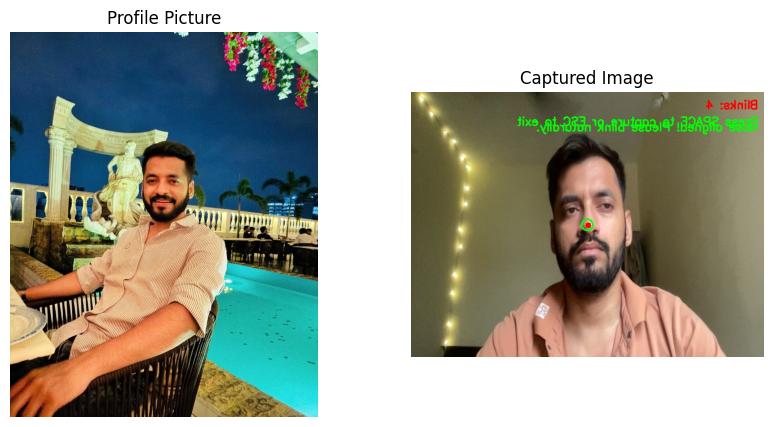

🧠 Comparing profile picture with captured image...
Status Code: 200
✅ Similarity Score: 87.008
✔️ Match? Yes (Threshold: 62.327)


In [12]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tempfile
import firebase_admin
from firebase_admin import credentials, firestore
import numpy as np
import dlib
from scipy.spatial import distance as dist

# Initialize Firebase Admin SDK
if not firebase_admin._apps:
    cred = credentials.Certificate('/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/classmate-ai-63d5b-firebase-adminsdk-dizo8-ee94ad30f2.json')
    firebase_admin.initialize_app(cred)

db = firestore.client()

def get_user_profile_picture(user_id):
    user_ref = db.collection('users').document(user_id)
    doc = user_ref.get()
    if doc.exists:
        data = doc.to_dict()
        return data.get('profilePicture')
    else:
        print(f"User {user_id} not found in Firestore.")
        return None

def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

# Nose alignment parameters
TARGET_NOSE_POS = (320, 240)  # target position in the frame (center for 640x480)
NOSE_ALIGN_THRESH = 15        # pixels tolerance

def draw_nose_guide(frame, detected_nose_pos):
    # Draw the target circle (green)
    cv2.circle(frame, TARGET_NOSE_POS, 10, (0, 255, 0), 2)
    
    # Draw detected nose position (red dot)
    cv2.circle(frame, detected_nose_pos, 5, (0, 0, 255), -1)
    
    # Calculate offset
    offset_x = detected_nose_pos[0] - TARGET_NOSE_POS[0]
    offset_y = detected_nose_pos[1] - TARGET_NOSE_POS[1]

    # Show direction hints if outside threshold
    if abs(offset_x) > NOSE_ALIGN_THRESH or abs(offset_y) > NOSE_ALIGN_THRESH:
        direction = []
        if offset_x > NOSE_ALIGN_THRESH:
            direction.append("Move Left")
        elif offset_x < -NOSE_ALIGN_THRESH:
            direction.append("Move Right")
        if offset_y > NOSE_ALIGN_THRESH:
            direction.append("Move Up")
        elif offset_y < -NOSE_ALIGN_THRESH:
            direction.append("Move Down")

        cv2.putText(frame, ", ".join(direction), (10, 70),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        return False
    else:
        cv2.putText(frame, "Nose aligned! Please blink naturally.", (10, 70),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        return True

def blink_and_capture():
    EYE_AR_THRESH = 0.25
    EYE_AR_CONSEC_FRAMES = 3
    COUNTER = 0
    TOTAL = 0

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/shape_predictor_68_face_landmarks.dat")

    (lStart, lEnd) = (42, 48)
    (rStart, rEnd) = (36, 42)

    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("❌ Cannot open webcam")
        return None

    print("👀 Please align your nose with the green circle.")
    print("Then blink naturally several times to verify liveness.")

    captured_frame = None
    liveness_confirmed = False

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.resize(frame, (640, 480))  # ensure frame size

        # Mirror the frame horizontally for a mirror-like preview
        frame = cv2.flip(frame, 1)

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        rects = detector(gray, 0)

        nose_aligned = False
        for rect in rects:
            shape = predictor(gray, rect)
            shape = [(shape.part(i).x, shape.part(i).y) for i in range(68)]

            # Nose tip landmark index is 30
            nose_tip = shape[30]

            nose_aligned = draw_nose_guide(frame, nose_tip)

            if nose_aligned:
                leftEye = shape[lStart:lEnd]
                rightEye = shape[rStart:rEnd]

                leftEAR = eye_aspect_ratio(leftEye)
                rightEAR = eye_aspect_ratio(rightEye)

                ear = (leftEAR + rightEAR) / 2.0

                if ear < EYE_AR_THRESH:
                    COUNTER += 1
                else:
                    if COUNTER >= EYE_AR_CONSEC_FRAMES:
                        TOTAL += 1
                        print(f"Blink detected: {TOTAL}")
                    COUNTER = 0

        cv2.putText(frame, f"Blinks: {TOTAL}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        if not liveness_confirmed:
            if TOTAL >= 3 and nose_aligned:
                print("✅ Liveness confirmed by blinking.")
                liveness_confirmed = True
                print("📸 Press SPACE to capture your image, or ESC to cancel.")
        else:
            cv2.putText(frame, "Press SPACE to capture or ESC to exit", (10, 60),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        cv2.imshow("Nose Alignment & Liveness Detection", frame)
        key = cv2.waitKey(1) & 0xFF

        if key == 27:  # ESC key
            print("🚫 Operation cancelled.")
            break

        if liveness_confirmed and key == 32:  # SPACE key
            captured_frame = frame.copy()

            # Mirror the captured frame horizontally before saving
            captured_frame = cv2.flip(captured_frame, 1)

            print("✅ Image captured.")
            break

    cap.release()
    cv2.destroyAllWindows()

    if captured_frame is not None:
        temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
        cv2.imwrite(temp_file.name, captured_frame)
        print(f"✅ Image saved to {temp_file.name}")
        return temp_file.name
    else:
        return None

def compare_faces(image_url1, image_path2):
    url = "https://api-us.faceplusplus.com/facepp/v3/compare"
    api_key = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
    api_secret = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"

    with open(image_path2, 'rb') as f:
        response = requests.post(
            url,
            data={
                "api_key": api_key,
                "api_secret": api_secret,
                "image_url1": image_url1
            },
            files={
                "image_file2": f
            }
        )

    print("Status Code:", response.status_code)

    try:
        result = response.json()
        if "error_message" in result:
            print("❌ Face++ Error:", result["error_message"])
            return None
        else:
            confidence = result.get("confidence", 0)
            threshold = result.get("thresholds", {}).get("1e-3", 75.0)
            print(f"✅ Similarity Score: {confidence}")
            print(f"✔️ Match? {'Yes' if confidence >= threshold else 'No'} (Threshold: {threshold})")
            return confidence, confidence >= threshold
    except Exception as e:
        print("❌ JSON Decode Failed:", e)
        print("Raw response:", response.text)
        return None

def show_images_side_by_side(url1, local_path2):
    try:
        response1 = requests.get(url1)
        img1 = Image.open(BytesIO(response1.content))

        img2 = Image.open(local_path2)

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1)
        axs[0].set_title("Profile Picture")
        axs[0].axis('off')

        axs[1].imshow(img2)
        axs[1].set_title("Captured Image")
        axs[1].axis('off')

        plt.show()

    except Exception as e:
        print("Error displaying images:", e)

def main():
    user_id = "7jQAbpD8u2g31DGLDAkNmeIEPbp2"

    profile_pic_url = get_user_profile_picture(user_id)
    if not profile_pic_url:
        print("No profile picture URL found.")
        return

    captured_image_path = blink_and_capture()
    if not captured_image_path:
        print("❌ Liveness check failed or capture cancelled. Cannot proceed.")
        return

    show_images_side_by_side(profile_pic_url, captured_image_path)

    print("🧠 Comparing profile picture with captured image...")
    compare_faces(profile_pic_url, captured_image_path)

if __name__ == "__main__":
    main()


👀 Align your face inside the box and blink 3 times to verify liveness.
Blink detected: 1
Blink detected: 2
Blink detected: 3
✅ Liveness confirmed by blinking.
Selected blink image for comparison: /var/folders/0_/q7hlfhcn723fzh10jym7md6c0000gn/T/tmp14a1dewj.jpg


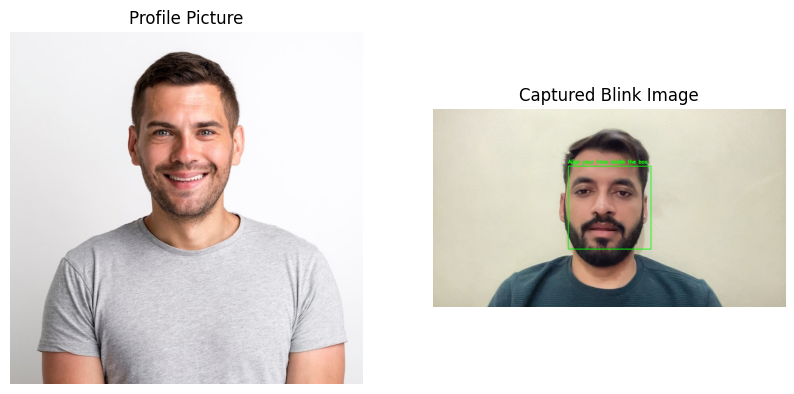

🧠 Comparing profile picture with selected blink image...
Status Code: 200
✅ Similarity Score: 49.295
✔️ Match? No (Threshold: 62.327)


In [1]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tempfile
import firebase_admin
from firebase_admin import credentials, firestore
import numpy as np
import dlib
from scipy.spatial import distance as dist
import random

# Initialize Firebase Admin SDK
if not firebase_admin._apps:
    cred = credentials.Certificate('/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/classmate-ai-63d5b-firebase-adminsdk-dizo8-ee94ad30f2.json')
    firebase_admin.initialize_app(cred)

db = firestore.client()

def get_user_profile_picture(user_id):
    user_ref = db.collection('users').document(user_id)
    doc = user_ref.get()
    if doc.exists:
        data = doc.to_dict()
        return data.get('profilePicture')
    else:
        print(f"User {user_id} not found in Firestore.")
        return None

def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

def save_frame(frame):
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    cv2.imwrite(temp_file.name, frame)
    return temp_file.name

def blink_and_capture_multiple():
    EYE_AR_THRESH = 0.25
    EYE_AR_CONSEC_FRAMES = 3
    COUNTER = 0
    TOTAL = 0

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("/Users/harshkumar/mac/Final Year project/CLASSMATE AI/classmate-ai copy/extra/shape_predictor_68_face_landmarks.dat")

    (lStart, lEnd) = (42, 48)
    (rStart, rEnd) = (36, 42)

    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("❌ Cannot open webcam")
        return None

    print("👀 Align your face inside the box and blink 3 times to verify liveness.")

    blink_frame_paths = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.flip(frame, 1)  # 👈 Flip the frame horizontally

        height, width = frame.shape[:2]

        # Define the alignment box
        box_width, box_height = 300, 300
        top_left = (width // 2 - box_width // 2, height // 2 - box_height // 2)
        bottom_right = (width // 2 + box_width // 2, height // 2 + box_height // 2)

        # Draw rectangle
        cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(frame, "Align your face inside the box", (top_left[0], top_left[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        rects = detector(gray, 0)

        face_in_box = False
        for rect in rects:
            face_x = (rect.left() + rect.right()) // 2
            face_y = (rect.top() + rect.bottom()) // 2

            if (top_left[0] < face_x < bottom_right[0]) and (top_left[1] < face_y < bottom_right[1]):
                face_in_box = True
                shape = predictor(gray, rect)
                shape = [(shape.part(i).x, shape.part(i).y) for i in range(68)]

                leftEye = shape[lStart:lEnd]
                rightEye = shape[rStart:rEnd]

                leftEAR = eye_aspect_ratio(leftEye)
                rightEAR = eye_aspect_ratio(rightEye)

                ear = (leftEAR + rightEAR) / 2.0

                if ear < EYE_AR_THRESH:
                    COUNTER += 1
                else:
                    if COUNTER >= EYE_AR_CONSEC_FRAMES:
                        TOTAL += 1
                        print(f"Blink detected: {TOTAL}")
                        blink_path = save_frame(frame)
                        blink_frame_paths.append(blink_path)
                    COUNTER = 0
            else:
                cv2.putText(frame, "⚠️ Face not aligned!", (10, height - 20),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        cv2.putText(frame, f"Blinks: {TOTAL}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        cv2.imshow("Blink Detection", frame)
        key = cv2.waitKey(1) & 0xFF

        if TOTAL >= 3:
            print("✅ Liveness confirmed by blinking.")
            break

        if key == 27:  # ESC key
            print("🚫 Operation cancelled.")
            break

    cap.release()
    cv2.destroyAllWindows()

    if len(blink_frame_paths) == 0:
        print("❌ No blink frames captured.")
        return None

    selected_blink_image = random.choice(blink_frame_paths)
    print(f"Selected blink image for comparison: {selected_blink_image}")
    return selected_blink_image


def compare_faces(image_url1, image_path2):
    url = "https://api-us.faceplusplus.com/facepp/v3/compare"
    api_key = "s3OsuhETdH9eujyOSJMVOmZNCrXL7e2q"
    api_secret = "4qrIaNwoASiDOJaPpuMpwsj2cxazO1RE"

    with open(image_path2, 'rb') as f:
        response = requests.post(
            url,
            data={
                "api_key": api_key,
                "api_secret": api_secret,
                "image_url1": image_url1
            },
            files={
                "image_file2": f
            }
        )

    print("Status Code:", response.status_code)

    try:
        result = response.json()
        if "error_message" in result:
            print("❌ Face++ Error:", result["error_message"])
            return None
        else:
            confidence = result.get("confidence", 0)
            threshold = result.get("thresholds", {}).get("1e-3", 75.0)
            print(f"✅ Similarity Score: {confidence}")
            print(f"✔️ Match? {'Yes' if confidence >= threshold else 'No'} (Threshold: {threshold})")
            return confidence, confidence >= threshold
    except Exception as e:
        print("❌ JSON Decode Failed:", e)
        print("Raw response:", response.text)
        return None

def show_images_side_by_side(url1, local_path2):
    try:
        response1 = requests.get(url1)
        img1 = Image.open(BytesIO(response1.content))

        img2 = Image.open(local_path2)

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1)
        axs[0].set_title("Profile Picture")
        axs[0].axis('off')

        axs[1].imshow(img2)
        axs[1].set_title("Captured Blink Image")
        axs[1].axis('off')

        plt.show()

    except Exception as e:
        print("Error displaying images:", e)

def main():
    user_id = "7jQAbpD8u2g31DGLDAkNmeIEPbp2"

    profile_pic_url = get_user_profile_picture(user_id)
    if not profile_pic_url:
        print("No profile picture URL found.")
        return

    blink_image_path = blink_and_capture_multiple()
    if not blink_image_path:
        print("❌ Liveness check failed or no blink images captured.")
        return

    show_images_side_by_side(profile_pic_url, blink_image_path)

    print("🧠 Comparing profile picture with selected blink image...")
    compare_faces(profile_pic_url, blink_image_path)

if __name__ == "__main__":
    main()
